In [1]:
from IPython.display import HTML
HTML('''
<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
''')

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<h1 style="color:#fd1617">Title</h1>

<font size="6" style="color:#fd1617"><b>Disneyland Reviews Clustering Sentiment Analysis:</b><br></font><font size="5" style="color:#f7c020">Is it really the happiest place on earth?</font><br><br>
<center><img src="./Disneyland_Review_Banner.png" width="90%" height="90%"></center>
<center>Image 01. Disneyland Reviews Clustering Sentiment Analysis.</center>

<h1 style="color:#fd1617">Executive Summary</h1>

This project aims to understand the sentiment of the reviewers concerning their Disneyland experience with the use of clustering techniques. We should see mostly positive reviews about the theme park because Disneyland is often called the happiest place on earth. However, we have seen interesting results in our study. The outcome of this study can help understand the visitors' sentiments about the park and further improve Disneyland's operations and services. 

For us to study the data, we used the CSV file provided with reviews from 2010 up to 2019 for three parks (Hongkong, Paris, and California). After initial analysis, we understood that the data was clean and ready to be used. Hence we did not perform any data cleaning or imputations. And then, we loaded it into a SQL database for the processing of EDA and performed clustering using Python with the aid of various libraries such as `sklearn` and `nltk`.

We managed to process rows in our data set and utilized the `min_df = 1%` and `Ingram = 2,2` (consider only bigram) of TFIDF to help reduce the features and use dimensionality reduction. The group also tried many features in our bag of words; however, we found out that even after reducing the columns, we had the same results. Moreover, we have done multiple iterations and tested three different clustering methods: representative, hierarchal, and density-based. Finally, we have concluded that representative with k-means provides optimal results. 

We have provided an output for the optimal clusters (all data and per park) using internal validation scores. We investigated if we expand into more clusters that are still parsimonious enough for each cluster to make sense. Expanding the clusters can flesh out more interesting topics that are not easily detectable with smaller clusters. We are confident that the quality of the clusters we provided is significant enough to give value to the business. To conclude, the representation of the clusters is subjective to our analysis and may have a more enriched interpretation if domain experts investigate the outcome further.


<h1 style="color:#fd1617">Problem Statement</h1>

The report aims to understand the sentiment of the visitors of Disneyland based on their reviews:
1. What is the actual sentiment of the visitors about Disneyland? Is it positive as its regarded as the happiest place on earth?
2. Does the sentiment from each park differ? 


<h1 style="color:#fd1617">Introduction</h1>

A theme park is an amusement park with themed rides and attractions. Nowadays, kids and even adults are fond of visiting theme parks. These are usually the go-to places for people when they’re on vacation. Different countries would have their types of theme parks. However, one theme park can stand out due to its popularity. One of the most popular theme parks is **Disneyland**.

Initially opened in 1955, Disneyland was the first theme park opened by **The Walt Disney Company**. The theme circles around all things Disney. The rides and attractions are based on Disney characters and their movies or shows. With the popularity of Disney, their theme park has expanded to multiple branches all over the world. This study will focus on 3 Disneyland branches, mainly Hongkong, California, and Paris. [1]

Deemed the *“Happiest Place”* on Earth, Disneyland prides itself on creating a fantastic customer experience. It has built a loyal fan base with its magical and personalized approach to customer experience. As Disney is often regarded for its magical approach to customer service, it welcomes many visitors with a high return rate for first-time customers. [2]

Thanks to social media, everything can now be posted online with a click. Viral pictures and videos happen nowadays more often because of easier access to the internet. Businesses may **benefit or suffer** due to social media depending on reviews and comments of customers. 

Disneyland has been around for a very long time. It had its fair share of **praise and criticism**. The study can help by analyzing the data and determining how to improve its operations based on the reviews of the customers. With thousands of reviews, the study can compress the data and show the necessary figures to create a substantial report. 

<h1 style="color:#fd1617">Data Description</h1>

<h2 style="color:#f7c020">Data Sources and Description</h2>

The study uses a single dataset from the CSV file provided. The Disneyland CSV file contains the reviews (`Review_Text`) from 2010 to 2019 for three parks (`Hongkong`, `Paris`, and `California`). Each of the reviews provides a rate (`Rating`), and we can further categorize it by the park (`Branch`), the reviewers' country (`Reviewer_Location`), and when it was reviewed (`Year_Month`). Data is clean and can be used as is though we have found missing dates in `Year_Month` however, this would not impact the overall clustering we did. We also added `Year` and `Month` columns separately to help ease up querying and analysis.

<table style="width:100%">
    <tr style="background-color:#f7c020;">
      <th style="width:15%; text-align:center">Variable Name</th>
      <th style="width:70%; text-align:center" >Data Description</th>
      <th style="width:10%; text-align:center">Data Type</th>
    </tr>
    <tr>
        <td style="text-align:left">Review_ID</td>
        <td style="text-align:left">Unique ID for each of the reviews.</td>
        <td style="text-align:left">Integer</td>
      </tr>
   <tr>
      <td style="text-align:left">Rating</td>
      <td style="text-align:left">Rating given by the reviewer (Possible values: 1, 2, 3, 4, 5).</td>
      <td style="text-align:left">Integer</td>
    </tr>
   <tr>
      <td style="text-align:left">Year_Month</td>
      <td style="text-align:left">Year and month of the review.</td>
      <td style="text-align:left">Text</td>
    </tr>
    <tr>
      <td style="text-align:left">Reviewer_Location</td>
      <td style="text-align:left">Country of origin of the reviewer.</td>
      <td style="text-align:left">Text</td>
    </tr>
    <tr>
      <td style="text-align:left">Review_Text</td>
      <td style="text-align:left">Text component of the review.</td>
      <td style="text-align:left">Text</td>
    </tr>
    <tr>
      <td style="text-align:left">Branch</td>
      <td style="text-align:left">Disneylad park visited by the reviewer (Possible values: Hongkong, Paris, and California).</td>
      <td style="text-align:left">Text</td>
    </tr>
    <tr>
      <td style="text-align:left">Year</td>
      <td style="text-align:left">Year and month of the review.</td>
      <td style="text-align:left">Text</td>
    </tr>
    <tr>
      <td style="text-align:left">Month</td>
      <td style="text-align:left">Month of the review.</td>
      <td style="text-align:left">Text</td>
    </tr>
  </table>

<h2 style="color:#f7c020">Data Assumptions and Limitations</h2>

The study is limited only to the dataset provided in Jojie, and we have not added or modified the source. Initially, we were planning to limit the data from 2018 to 2019 because our first batch of tests ran slow, and we could not perform a single bag of wards (`ngram=1`) due to space constraints. However, as described earlier, we have reduced the features using `TFIDF` min_df feature to only 1% minimum hence limiting the number of words we have. In addition, the output of the cluster has also been lemmatized for simpler analysis and grouping using the standard `NLTK` library.

<h1 style="color:#fd1617">Methodology</h1>

<center><img src="./Disneyland_Review_Methodology.png" width="90%" height="90%"></center>
<center>Image 02. Disneyland Reviews Methodology.</center>

<h2 style="color:#f7c020">Data Loading and Preparation</h2>

The first step in our Data Mining and Wrangling activity is to analyze the files and load them to SQL for a standardized source.
* We have identified `42,656 rows` of data with 2613 rows of missing dates.
* The date is not critical for our clustering; hence we will be loading all data into SQL
* SQL Table `disneyland_reviews` was created where all rows columns were loaded from the CSV file along with two additional `year` and `month` columns to ease processing.

<h2 style="color:#f7c020">Exploratory Data Analysis</h2>

After the data loads, we performed Exploratory Data Analysis (**EDA**) to see additional insights with the data using the other categories.
* Charts to see the review scores significance of each category.
    * Time Period
    * Reviewer Location 
    * Branch
* Trend on the review growth based on the time.
* WordCloud as a baseline for the most frequent words used in the review.

EDA helped us identify an initial set of combinations we can use for the TFIDF frequencies.

<h2 style="color:#f7c020">Text Data Processing: Data Vectorization</h2>

This step is critical to organize the words in the `Review_Text` we will use as features in the clustering. 
* Each of the documents in the corpus went through this process of cleaning using the `NLTK` library:
    * Removing non-A-Z a-z characters
    * Tokenize each document.
    * Removal of common English stop words.
    * Lemmatizing each document with each token
* The returned corpus was vectorized with TFIDF based on the optimal parameters we have found.
    * `min_df=.01`
    * `max_df=.95`
    * `stop_words`, we have added a few more custom stop words here like 'Disneyland',  'Walt' , and 'Disney' as these are too frequent in the reviews, and having them does not produce good results.
    * `ngram_range=(2, 2)`, meaning we only get the pairing of 2 words (bigram).
    
The number of rows has been reduced to `35986` because TFIDF.

<h2 style="color:#f7c020">Dimensionality Reduction: SVD/LSA</h2>

The results of the vectorized corpus will be processed with SVD/LSA process to reduce the needed dimensions further.
*	The vectorized corpus will now be processed in TruncatedSVD as a whole, where we will perform LSA.
*	Post-transformation of the corpus, we will reduce the dimensions further to speed up the processing.
*	We use `80% Explained Variance` with `108 components` as our new parameter.
*	We will use the 108 as the new component and refit, then transform the corpus again with the reduced dimensions. 
*	Perform a scatterplot on the first two dimensions to visualize the data.
*	A similar exercise we applied with the branches.

<h2 style="color:#f7c020">Clustering</h2>

Now we will perform the core of the study, which is a clustering of the corpus from the reduced dimensions LSA. Finally, we will determine the optimal number of clusters and analyze each of the outputs.
*	Performed representative clustering using K-Means with assigned random state for consistency of output.
*	Performed hierarchal clustering using (Single, Ward, Complete, and Average)
*	Performed density-based clustering using (DBSCAN and OPTICS)
*	Post execution, we studied each one and determined that k-means provide the best results.
*	With k-means using internal validation scores and the criteria of a good cluster, the best k is around 2-3. 
*	We iterated and explored further, expanding the clusters to around 4 to 8 to see if there were topics we could uncover. Fortunately, we've seen different topics instead of sticking to 2-3 clusters.
*	Similarly, we've applied k-means to each park (Hongkong, Paris, California), where we have also provided our insights.

<h2 style="color:#f7c020">Cluster Labeling and Analysis</h2>

The last step is to complete the labeling of each cluster. Here we generated the top 10 pairs of text to understand the topics within each, presented as WordCloud. From this WordCloud, end-users could extract valuable information by analyzing each topic.

<h1 style="color:#fd1617">Data Processing</h1>

In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import sqlite3
import re
from tqdm import tqdm
from collections import Counter
from matplotlib import pyplot as plt
from time import time
import warnings 
warnings.filterwarnings("ignore")

# Text Data Processing
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words

# Dimensionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, fcluster


# Clustering
from sklearn.base import clone
from sklearn.cluster import KMeans
from sklearn.metrics import (calinski_harabasz_score,
                             silhouette_score, davies_bouldin_score)
from scipy.cluster.hierarchy import dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from fastcluster import linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-gkipxlny because the default path (/home/fgarcia/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
# Figure caption
fig_num = 1
def fig_caption(title, caption):
    """Print figure caption on jupyter notebook"""
    global fig_num
    display(HTML(f"""<p style="font-size:11px;font-style:default;">
                     <center><b>
                     Figure {fig_num}. {title}.</b>
                     <br>{caption}</center></p>"""))
    fig_num += 1

<h2 style="color:#f7c020">Data Loading and Preparation</h2>

In [5]:
# Connecting to a db in a masked file path
with open('filepath.txt') as f:
    filepath = f.readline().split('"')[1]

conn = sqlite3.connect(f'{filepath}/disneyland_reviews.db')

Shown below is the first 5 rows of our `disneyland_reviews` dataset.

In [6]:
df = pd.read_sql('SELECT * FROM disneyland_reviews', conn)
display(df.head())

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year Month  
0  2019     4  
1  2019     5  
2  2019     4  
3  2019     4  
4  2019     4

In [7]:
df_sql2 = pd.read_sql(
    'SELECT * FROM disneyland_reviews WHERE year>=2010', conn)

<h2 style="color:#f7c020">Exploratory Data Analysis</h2>

Before we proceed with clustering, we are going to perform exploratory data analysis to derive insights.

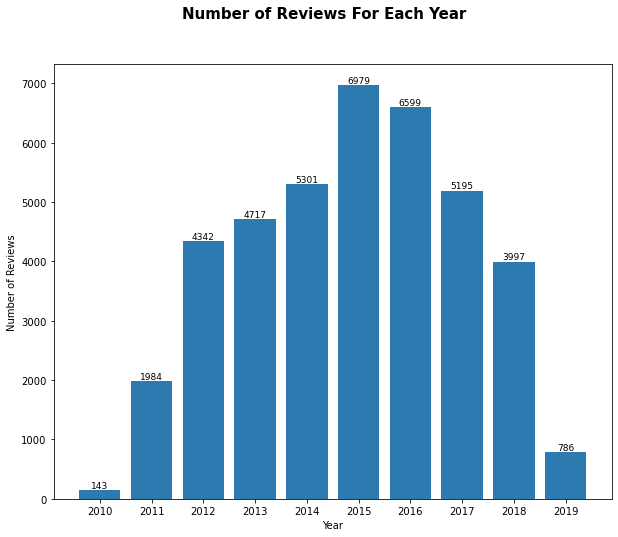

In [8]:
"""
Display number of reviews for each year in a bar graph
"""

year_branch = df_sql2.groupby('Year', as_index=False).agg({'Branch':'count'})

x = year_branch['Year']
y = year_branch['Branch']
plt.figure(figsize=(10,8))
plt.bar(x, y, color = '#2c7aaf')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],
             fontsize = 9,
             horizontalalignment='center',
             verticalalignment='bottom') 
    
plt.ylabel('Number of Reviews')
plt.xlabel('Year')
plt.suptitle('Number of Reviews For Each Year', 
                     fontsize=15, fontweight='semibold')
plt.show()
fig_caption('Number of Reviews For Each Year', '')

The bar graph shows the number of reviews for each year. 2015 has the most with 6979 reviews while 2010 has the least with 143. Since 2015, the trend for the number of reviews went down.

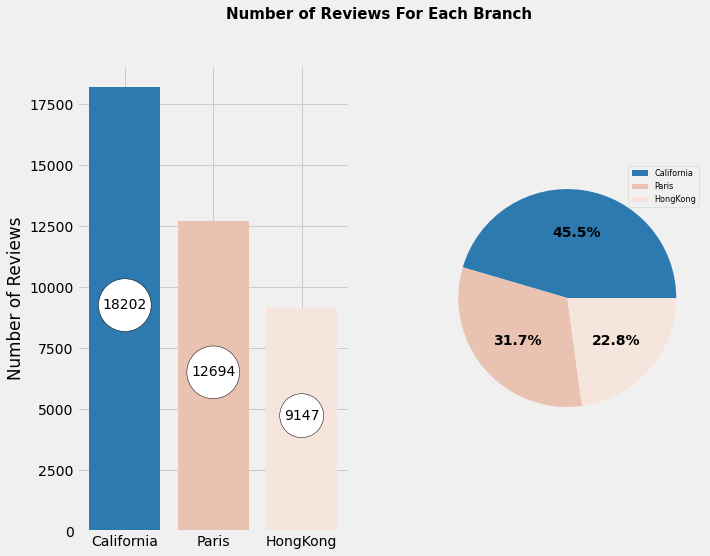

In [9]:
"""
Display number of reviewers for each branch in a bar graph and display
its percentage in a pie graph
"""

branch_count = df_sql2.Branch.value_counts()
branch_col2 = ['#2c7aaf', '#eac2b1', '#f5e5dd']

branch_name = [branch[11:] for branch in branch_count.index] 

with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 2, figsize=(10, 8))
    plt.subplots_adjust(wspace=0.3)
    
    ax[0].bar(branch_name, 
              branch_count.values, 
              color=branch_col2)
    for x , y, col in zip(branch_name, 
                     branch_count.values, branch_col2):
        ax[0].text(x, y/2, y, 
                   ha='center',color='black', 
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='circle'))
    ax[0].set_ylabel('Number of Reviews')

    ax[1].pie(x=branch_count.values, 
              colors=branch_col2,  
              autopct='%1.1f%%', textprops=dict(color='black', weight='bold'))
    ax[1].legend(labels=branch_name, loc='upper right', fontsize="xx-small")
    
    plt.suptitle('Number of Reviews For Each Branch', 
                     fontsize=15, fontweight='semibold')
    plt.show()
fig_caption('Number of Reviews For Each Branch', '')

The bar graph shows the number of reviews for each branch. California has 18,202 reviews or 45.50% of the total number, which is expected since California has the most visitors. [3]

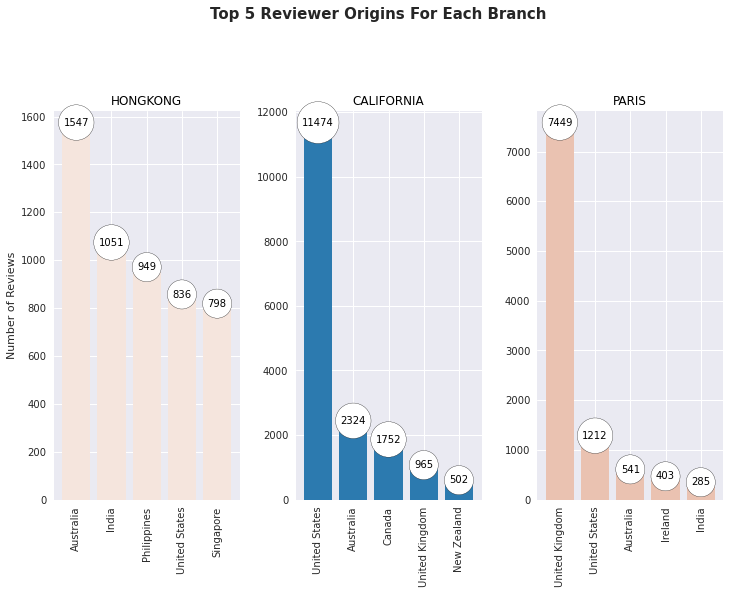

In [10]:
"""
Display top 5 reviewer location of each branch in a bar graph
"""

branch_col = ['#f5e5dd', '#2c7aaf', '#eac2b1']
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))
    plt.subplots_adjust(top=0.8, wspace=0.3)
    for i, (branch, col) in enumerate(zip(df_sql2.Branch.unique(), branch_col)):

        loc_count = df_sql2[df_sql2.Branch == branch]['Reviewer_Location'].value_counts()[:5]

        x = loc_count.index
        y = loc_count.values
        ax[i].bar(x, y, color=col)
        ax[0].set_ylabel('Number of Reviews')
        ax[i].set_title(branch.upper()[11:], color='black')
        ax[i].tick_params(axis='x', rotation=90)
        for c, val in zip(x, y):
            ax[i].text(c, val*1.01, val, ha='center', color='black',
                       bbox=dict(facecolor='white', 
                                 edgecolor='black', 
                                 boxstyle="circle", pad=0.5))

    fig.suptitle('Top 5 Reviewer Origins For Each Branch', 
                     fontsize=15, fontweight='semibold')
plt.show()
fig_caption('Top 5 Reviewer Origins For Each Branch', '')

The bar graphs above show the top 5 reviewer origins for each branch.
* For `Hongkong` Disneyland, the top country origin of reviewers is `Australia`.
* For `California` Disneyland, the top country origin of reviewers is `United States`.
* For `Paris` Disneyland, the top country origin of reviewers is `United Kingdom`.

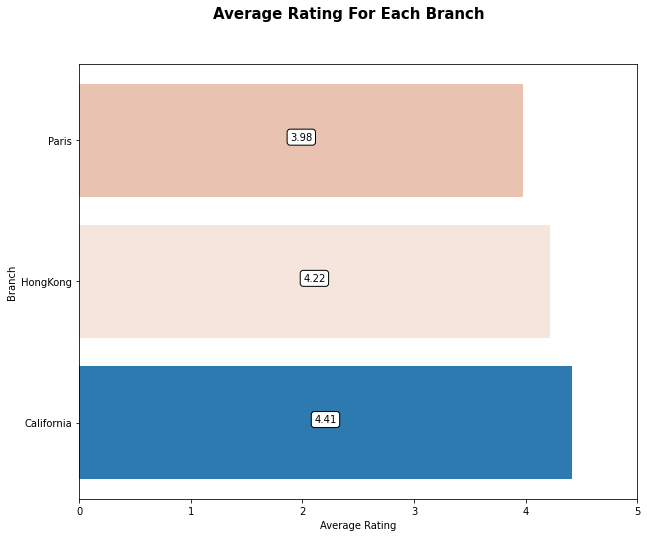

In [11]:
"""
Displays the average rating of each branch in a bar graph
"""

branch_ratings = df_sql2.groupby('Branch').agg({'Rating': 'mean'}).unstack()['Rating']
plt.figure(figsize=(10, 8))
plt.barh([branch[11:] for branch in branch_ratings.index], 
         branch_ratings.values, 
         color=['#2c7aaf', '#f5e5dd', '#eac2b1'])
for val, p in zip(branch_ratings.values, [branch[11:] for branch in branch_ratings.index]):
    plt.text(val/2, p, round(val, 2), color='black', ha='center', 
            bbox=dict(boxstyle='round', facecolor='white'))
plt.ylabel('Branch')
plt.xlabel('Average Rating')
plt.xticks(np.arange(0, 6))
plt.suptitle('Average Rating For Each Branch', 
                     fontsize=15, fontweight='semibold')
plt.show()
fig_caption('Average Rating For Each Branch', '')

The bar graph shows the average rating of the three branches from 2010 to 2019. The highest-rated Disneyland branch is in `California`, and `Paris` is the lowest-rated.

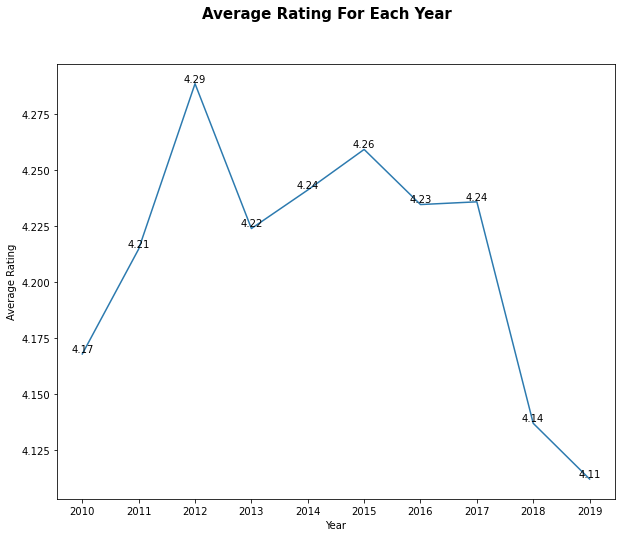

In [12]:
"""
Display the average rating for each month of every year in a line graph
"""

year_star = df_sql2.groupby('Year', as_index=False).agg({'Rating':'mean'})

x = year_star['Year']
y = year_star['Rating']

plt.figure(figsize=(10,8))
plt.plot(x, y, color = '#2c7aaf')
plt.xticks(x)
for i, v in enumerate(x):
    plt.text(v, y[i], round(y[i],2),
             fontsize=10,
             horizontalalignment='center',
             verticalalignment='bottom') 
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.suptitle('Average Rating For Each Year', 
                     fontsize=15, fontweight='semibold')
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot()
plt.show()
fig_caption('Average Rating For Each Year', '')

The line graph shows the average rating of Disneyland from 2010 to 2019. The trend is increasing until 2012. It then experienced long years of stagnation. By 2018, the ratings start to decline drastically.

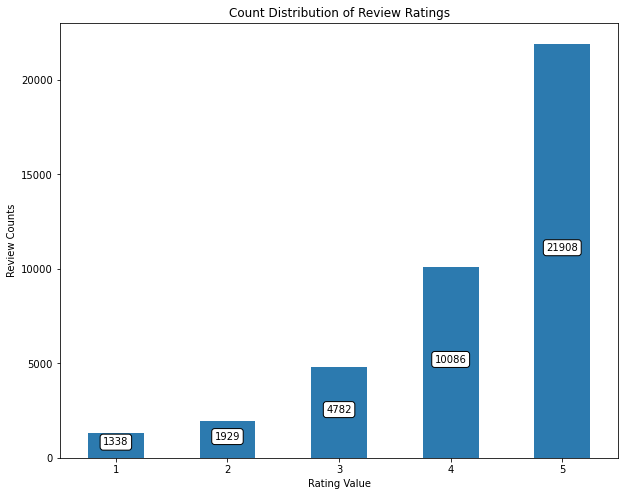

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
branch_ratings = df_sql2.groupby('Rating').agg({'Rating': 'count'}).unstack()['Rating']
branch_ratings.plot(kind='bar', ax=ax, color='#2c7aaf')
for i, val in enumerate(branch_ratings.values):
    ax.text(i, val/2, val, color='black', ha='center', 
            bbox=dict(boxstyle='round', facecolor='white'))

ax.tick_params(axis='x', labelrotation=0)
ax.set_ylabel('Review Counts')
ax.set_xlabel('Rating Value')
ax.set_title('Count Distribution of Review Ratings')
plt.show()
fig_caption('Count Distribution of Review Ratings', '')

The dataset is imbalanced in favor of high review ratings (4 or 5). Therefore, we could expect in our clustering later that most data belongs to a cluster representing a positive topic.

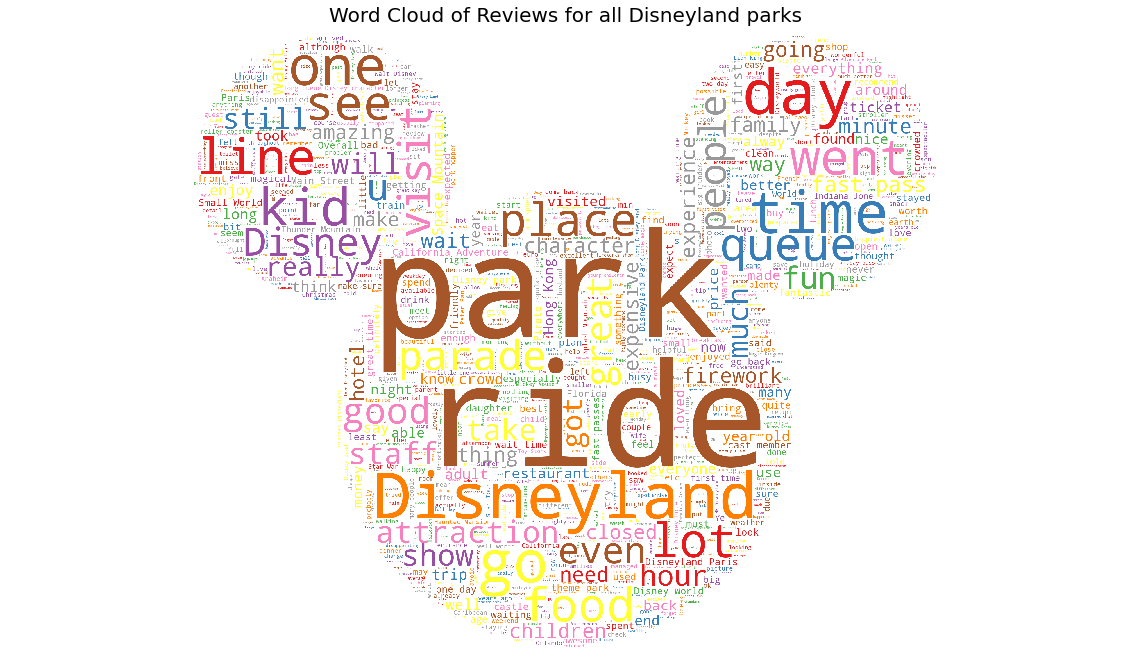

In [14]:
data1 = df['Review_Text'].str.replace('https', '')
data1 = data1.to_frame()
data = data1['Review_Text'].str.replace('t.co', '')
data = data.to_frame()

text = ' '.join(data['Review_Text'].tolist())

mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(stopwords=STOPWORDS, mask=mask,
               background_color="white",
               max_words=1000, max_font_size=500,
               random_state=42, width=800,
               height=800, colormap='Set1')

plt.figure(figsize=(20, 20))
plt.tight_layout(pad=0)
wc.generate(text)
plt.imshow(wc, interpolation="None")
plt.axis('off');
plt.title('Word Cloud of Reviews for all Disneyland parks', fontsize=20)
fig_caption('Word Cloud of Reviews for all Disneyland parks', '')

Initially, we have an intuition on the potential clustering of topics. However, actual results may differ, given that we will apply further filters with the frequency and combination of words we will see in the upcoming steps.

<h2 style="color:#f7c020">Text Data Processing: Data Vectorization</h2>

In [15]:
def rmv_emails_websites(string):
    """Function removes emails, websites and numbers."""
    new_str = re.sub(r"\S+@\S+", ' ', string)
    new_str = re.sub(r"\S+.co\S+", ' ', new_str)
    new_str = re.sub(r"\S+.ed\S+", ' ', new_str)
    new_str = re.sub(r"[0-9]+", ' ', new_str)
    new_str = re.sub(r"[^A-Za-z]", ' ', new_str)
    return new_str


def process_text(corpus):
    """Function removes stop words and lemmatizes each token."""
    # Uncomment this part if no nltk library yet
    # nltk.download('punkt')
    # nltk.download('stopwords')
    # nltk.download('wordnet')

    stemmer = WordNetLemmatizer()

    # Remove non letters and turn to lower case
    print('Removing non A-Z a-z...')
    corp_processed = corpus.apply(lambda x: rmv_emails_websites(x.lower()))
    corp_tokenized = corp_processed.apply(lambda x: word_tokenize(x))

    print('Removing stop words...')
    for w in corp_tokenized:
        if w in stopwords.words('english'):
            corp_tokenized.remove(w)

    print('Applying autocorrect and stem word...')
    for i in range(len(corp_tokenized)):
        corp_tokenized[i] = [stemmer.lemmatize((word))
                             for word in corp_tokenized[i]]

    print('Text cleaning done.')
    clean_corpus = corp_tokenized.apply(lambda x: " ".join(x))

    return clean_corpus


def vectorize_corpus(txt, feat=None):
    """Transforms a collection of text documents into a TF-IDF matrix"""
    stpwrds = _stop_words.ENGLISH_STOP_WORDS.union(['disneyland', 'world',
                                                    'walt', 'disney', 'ha',
                                                    'wa', 'let', 've', 'll'])

    print('Start vectorization...')
    tfidf = TfidfVectorizer(
        max_features=feat,
        min_df=0.01,
        max_df=0.95,
        stop_words=list(stpwrds),
        ngram_range=(2, 2)
    )
    tfidf.fit(txt)
    text = tfidf.transform(txt)
    nonzeros = text.sum(axis=1).nonzero()[0]
    text = text[nonzeros]
    print('Text vectorization done.')

    return text, tfidf

We will now apply text vectorization to our text reviews.

In [16]:
txt = process_text(df.Review_Text)
text, tfidf = vectorize_corpus(txt)
text_labels = tfidf.get_feature_names_out()
df_text = pd.DataFrame(text.toarray(), columns=text_labels)
display(df_text.head())

Removing non A-Z a-z...
Removing stop words...
Applying autocorrect and stem word...
Text cleaning done.
Start vectorization...
Text vectorization done.


able ride  adult child  adventure park  amusement park  best ride  \
0        0.0          0.0             0.0             0.0        0.0   
1        0.0          0.0             0.0             0.0        0.0   
2        0.0          0.0             0.0             0.0        0.0   
3        0.0          0.0             0.0             0.0        0.0   
4        0.0          0.0             0.0             0.0        0.0   

   best time  big ride  big thunder  buy ticket  buzz lightyear  ...  \
0        0.0       0.0          0.0         0.0        0.000000  ...   
1        0.0       0.0          0.0         0.0        0.346162  ...   
2        0.0       0.0          0.0         0.0        0.000000  ...   
3        0.0       0.0          0.0         0.0        0.000000  ...   
4        0.0       0.0          0.0         0.0        0.000000  ...   

   waiting line  waiting time  went ride  wonderful time  worth visit  \
0           0.0           0.0        0.0             0.0          0.0   
1           0.0           0.0        0.0             0.0          0.0   
2           0.0           0.0        0.0             0.0          0.0   
3           0.0           0.0        0.0             0.0          0.0   
4           0.0           0.0        0.0             0.0          0.0   

   year ago  year old  young child  young kid  yr old  
0       0.0       0.0          0.0        0.0     0.0  
1       0.0       0.0          0.0        0.0     0.0  
2       0.0       0.0          0.0        0.0     0.0  
3       0.0       0.0          0.0        0.0     0.0  
4       0.0       0.0          0.0        0.0     0.0  

[5 rows x 167 columns]

After applying text vectorization, we get a sparse matrix where the rows represent each review, and the columns are the words in our corpus. We also returned the tfidf vectorizer object.

<h2 style="color:#f7c020">Dimensionality Reduction: SVD/LSA</h2>

The minimum number of SVs to get at least 80% of explained variance is 108.


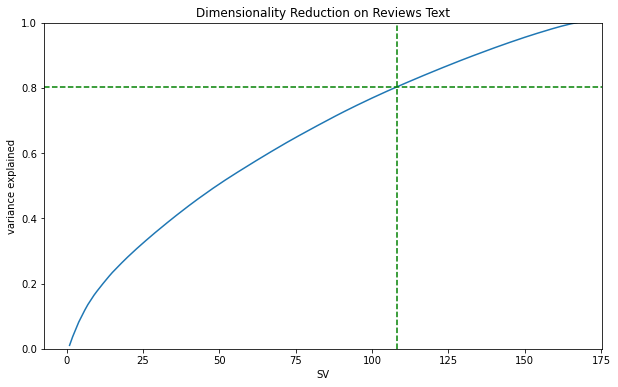

In [17]:
svd = TruncatedSVD(n_components=df_text.shape[1], random_state=214)
svd.fit_transform(df_text)
var_exp_cumsum = svd.explained_variance_ratio_.cumsum()
n_sv = np.argmax(var_exp_cumsum >= 0.8) + 1
print(f"The minimum number of SVs to get at least 80% of explained variance"
      f" is {n_sv}.")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(var_exp_cumsum)+1), var_exp_cumsum, '-',
        label='cumulative')
ax.set_ylim(0, 1)
ax.axvline(n_sv, ls='--', color='g')
ax.axhline(var_exp_cumsum[n_sv-1], ls='--', color='g')
ax.set_title('Dimensionality Reduction on Reviews Text')
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')
plt.show()
fig_caption('Dimensionality Reduction on Reviews Text', '')

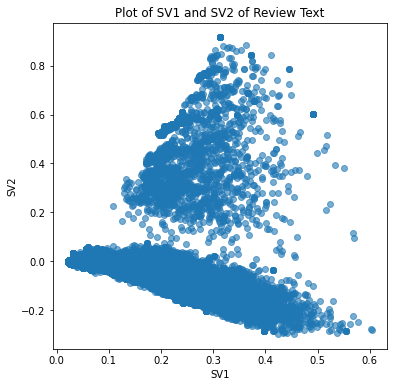

In [18]:
lsa = TruncatedSVD(n_components=n_sv, random_state=214)
text_ = lsa.fit_transform(df_text)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(text_[:, 0], text_[:, 1], alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('Plot of SV1 and SV2 of Review Text')
plt.show()
fig_caption('Plot of SV1 and SV2 of Review Text', '')

The plot above shows the first two components of SVD to visualize the data. We quickly see a very dense data area at the lower part of the plot and a less dense area at the upper half.

<h1 style="color:#fd1617">Results and Discussion</h1>

<h2 style="color:#f7c020">Clustering</h2>

We will now apply different clustering methods: representative, hierarchical, and density-based. For our report, we will implement all these three methods and determine the best method for the use case.

<h3 style="color:#000000">Representative Clustering (K-Means)</h3>

In [19]:
def cluster_range(X, clusterer, k_start, k_stop):
    """ Function captures the cluster labels, cluster centers, internal 
    validation for the given clusterer. This will be computed 
    across each K based from start to stop and returns the lists in a 
    dictionary.
    """
    ys = []
    centers = []
    inertias = []
    chs = []
    scs = []
    dbs = []
    for k in tqdm(range(k_start, k_stop+1)):
        clusterer_k = clone(clusterer)
        clusterer_k.n_clusters = k
        clusterer_k.fit(X)
        y = clusterer_k.labels_
        ys.append(y)
        chs.append(calinski_harabasz_score(X, y))
        scs.append(silhouette_score(X, y, random_state=1337))
        dbs.append(davies_bouldin_score(X, y))
        centers.append(clusterer_k.cluster_centers_)
        inertias.append(clusterer_k.inertia_)

    ret_dict = {'ys': ys, 'centers': centers, 'inertias': inertias,
                'chs': chs, 'scs': scs, 'dbs': dbs}

    return ret_dict


def plot_clusters(X_, ys, centers):
    """Plot clusters given the design matrix and cluster labels"""
    k_max = len(ys) + 1
    k_mid = k_max//2 + 2
    fig, ax = plt.subplots(2, k_max//2, dpi=150, sharex=True, sharey=True, 
                           figsize=(7,4), subplot_kw=dict(aspect='equal'),
                           gridspec_kw=dict(wspace=0.01))
   
    for k, y_, cs in zip(range(2, k_max+1), ys, centers):

        if k < k_mid:
            ax[0][k%k_mid-2].scatter(*zip(*X_), c=y_, s=1, alpha=0.8)
            ax[0][k%k_mid-2].scatter(
                cs[:,0],
                cs[:,1],
                s=10,
                c=range(int(max(y_)) + 1),
                marker='s',
                ec='k',
                lw=1
            );
            ax[0][k%k_mid-2].set_title('$k=%d$'%k)
        else:
            ax[1][k%k_mid].scatter(*zip(*X_), c=y_, s=1, alpha=0.8)
            ax[1][k%k_mid].scatter(
                cs[:,0],
                cs[:,1],
                s=10,
                c=range(int(max(y_))+1),
                marker='s',
                ec='k',
                lw=1
            );
            ax[1][k%k_mid].set_title('$k=%d$'%k)

    return ax


def plot_internal(inertias, chs, scs, dbs):
    """Plot internal validation values"""
    fig, ax = plt.subplots()
    ks = np.arange(2, len(inertias)+2)
    ax.plot(ks, inertias, '-o', label='SSE')
    ax.plot(ks, chs, '-ro', label='CH')
    ax.set_xlabel('$k$')
    ax.set_ylabel('SSE/CH')
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    ax2.plot(ks, scs, '-ko', label='Silhouette coefficient')
    ax2.plot(ks, dbs, '-gs', label='DB')
    ax2.set_ylabel('Silhouette/DB')
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines+lines2, labels+labels2)

    return ax

In [20]:
res = cluster_range(text_, KMeans(random_state=214), 2, 11)

100%|██████████| 10/10 [07:29<00:00, 44.96s/it]


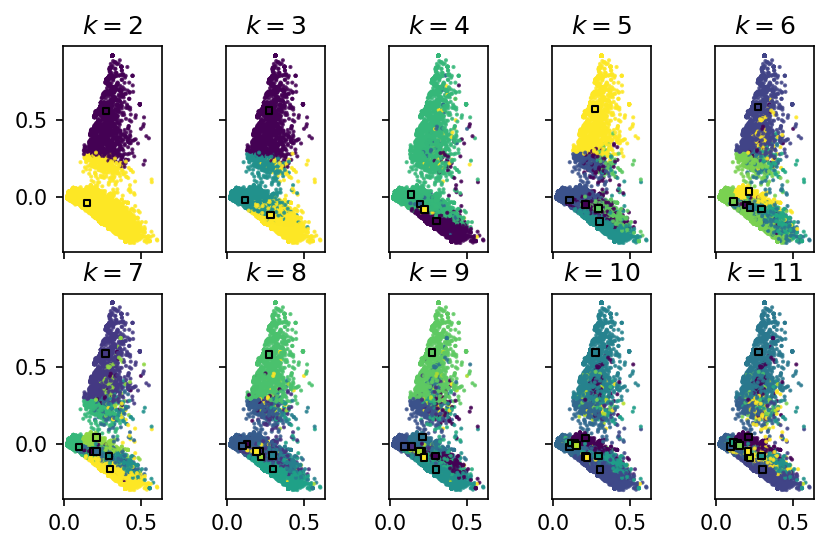

In [21]:
plot_clusters(text_[:, :2], res['ys'], res['centers'])
plt.show()
fig_caption('Plot of different K-Means clustering (k=2 to 11)', '')

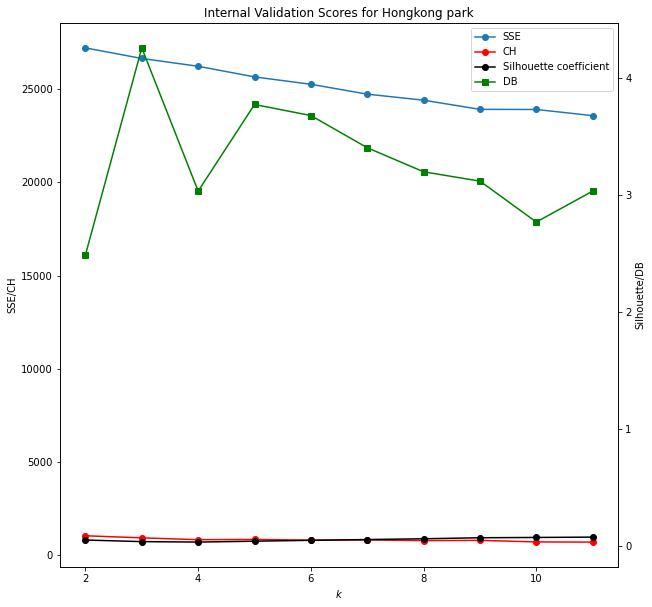

In [22]:
#Plot internal validation scores
plot_internal(res['inertias'], res['chs'], 
              res['scs'], res['dbs'])
plt.title('Internal Validation Scores for Hongkong park')
plt.show()
fig_caption('Internal Validation Scores for all Disneyland parks', '')

Using visual inspection on the different k clusters, we can observe that `k=2` and `k=3` seems to be the best option for K-Means clustering. This is also verified by the internal validation scores, using `DB` and `CH`.

<h3 style="color:#000000">Hierarchical Clustering (Single, Complete, Average, Ward)</h3>

In [23]:
def plot1(Z):
    """Accepts linkage output Z and returns cleaned (truncated) dendrogram"""
    fig, ax = plt.subplots()
    dn = dendrogram(Z, ax=ax, truncate_mode='level', p=5)
    ax.set_ylabel(r'$\Delta$');
    return fig

In this section, we will try four different Hierarchical clustering methods: `single linkage`, `complete linkage`, `average linkage`, and `ward method`.

**Single Linkage**

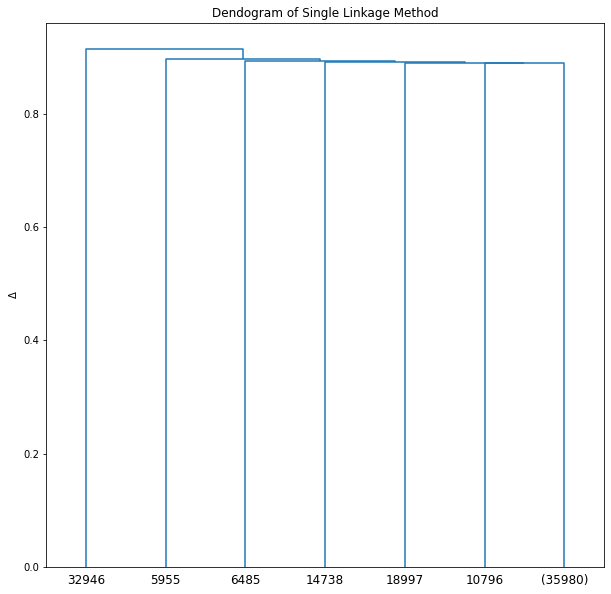

In [24]:
Z = linkage(text_, method='single')
plot1(Z)
plt.title('Dendogram of Single Linkage Method')
plt.show()
fig_caption('Dendogram of Single Linkage Method', '')

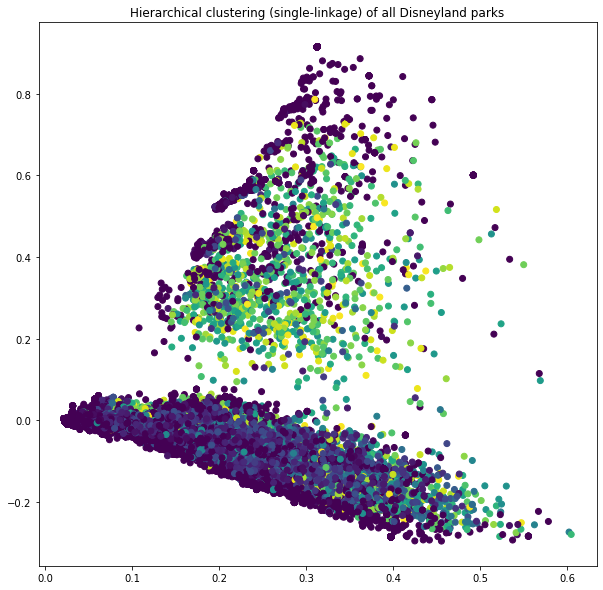

In [25]:
agg = AgglomerativeClustering(n_clusters=None, linkage='single',
                              distance_threshold=0.5)
y_predict = agg.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=y_predict)
plt.title('Hierarchical clustering (single-linkage) of all Disneyland parks')
plt.show()
fig_caption('Hierarchical clustering (single-linkage) of all Disneyland '
            'parks', '')

In [26]:
print(f"The single-linkage hierarchical clustering yields "
      f"{len(np.unique(y_predict))} clusters.")

The single-linkage hierarchical clustering yields 15521 clusters.


The best value for k occurs at k=7. From the generated dendrogram, the largest effort to merge occurs at around 0 to 0.8, so by setting a threshold between those values (in our case, we set it to `distance_threshold=0.5`), we could get better clustering. Applying this threshold, then plotting the points with colors indicating the cluster, the plot shows `15521 clusters`.

**Complete Linkage**

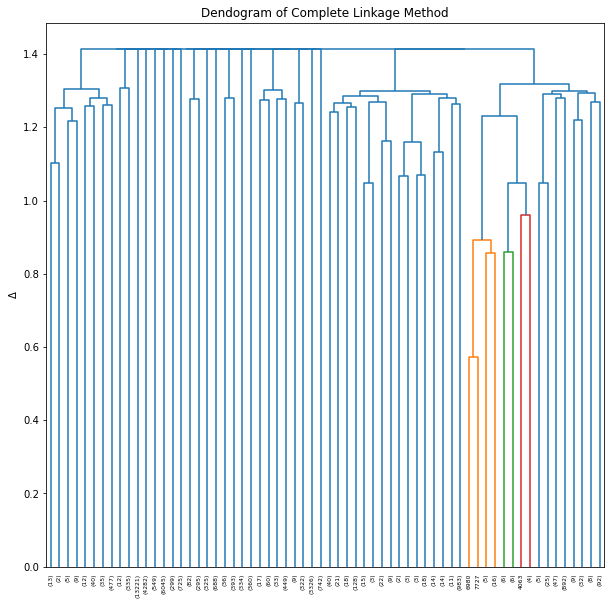

In [27]:
Z = linkage(text_, method='complete')
plot1(Z)
plt.title('Dendogram of Complete Linkage Method')
plt.show()
fig_caption('Dendogram of Complete Linkage Method', '')

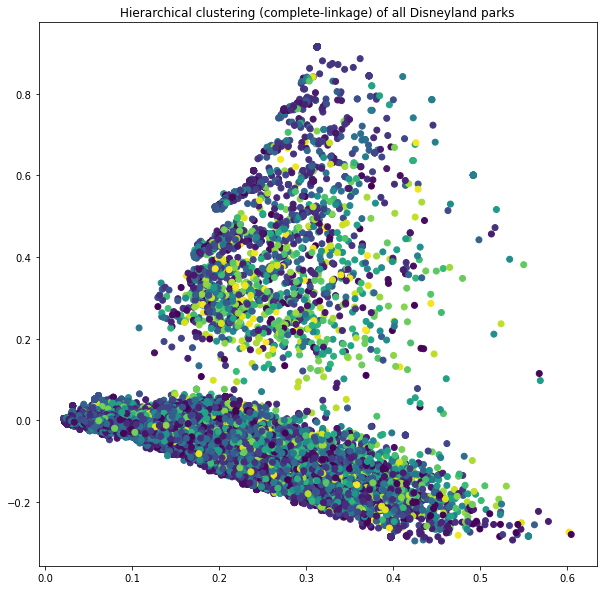

In [28]:
agg = AgglomerativeClustering(n_clusters=None, linkage='complete',
                              distance_threshold=0.7)
y_predict = agg.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=y_predict)
plt.title('Hierarchical clustering (complete-linkage) of all Disneyland '
          'parks')
plt.show()
fig_caption('Hierarchical clustering (complete-linkage) of all Disneyland '
            'parks', '')

In [29]:
print(f"The complete-linkage hierarchical clustering yields "
      f"{len(np.unique(y_predict))} clusters.")

The complete-linkage hierarchical clustering yields 12763 clusters.


The best value for k occurs at k=12763. From the generated dendrogram, the largest effort to merge occurs at around 0.6 to 0.8, so by setting a threshold between those values (in our case, we set it to `distance_threshold=0.7`), we could get better clustering. Applying this threshold, then plotting the points with colors indicating the cluster, the plot shows `12763 clusters`.

**Average Linkage**

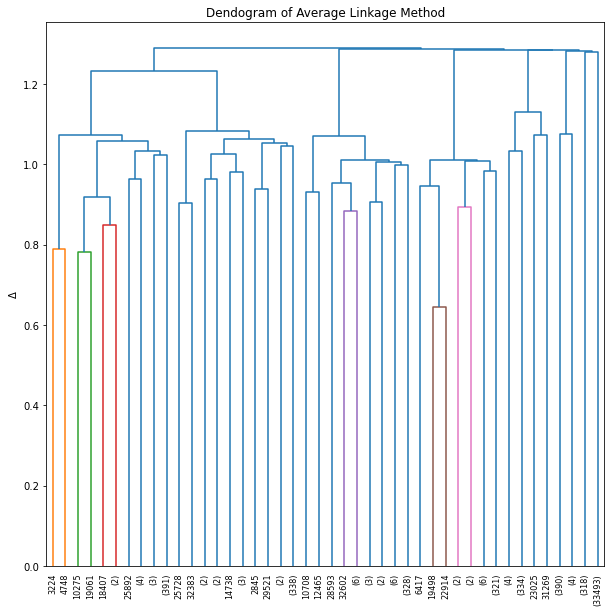

In [30]:
Z = linkage(text_, method='average')
plot1(Z)
plt.title('Dendogram of Average Linkage Method')
plt.show()
fig_caption('Dendogram of Average Linkage Method', '')

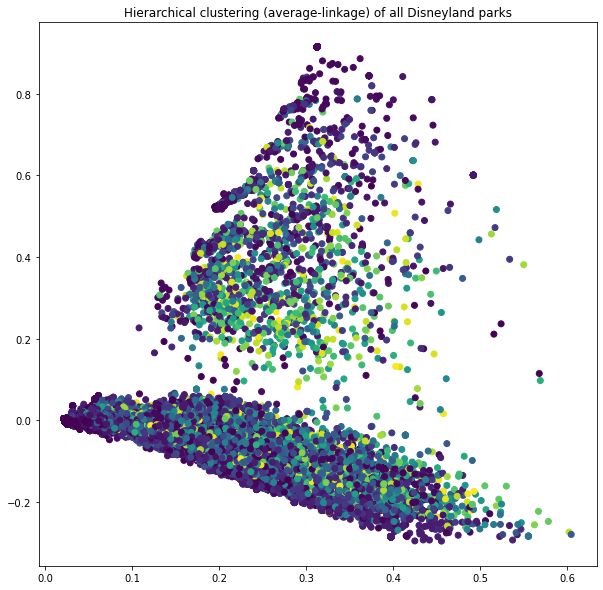

In [31]:
agg = AgglomerativeClustering(n_clusters=None, linkage='average',
                              distance_threshold=0.7)
y_predict = agg.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=y_predict)
plt.title('Hierarchical clustering (average-linkage) of all Disneyland '
          'parks')
plt.show()
fig_caption('Hierarchical clustering (average-linkage) of all Disneyland '
            'parks', '')

In [32]:
print(f"The average-linkage hierarchical clustering yields "
      f"{len(np.unique(y_predict))} clusters.")

The average-linkage hierarchical clustering yields 10421 clusters.


The best value for k occurs at k=10421. From the generated dendrogram, the largest effort to merge occurs at around 0.62 to 0.8, so by setting a threshold between those values (in our case, we set it to `distance_threshold=0.7`), we could get better clustering. Applying this threshold, then plotting the points with colors indicating the cluster, the plot shows `10421 clusters`.

**Ward Method**

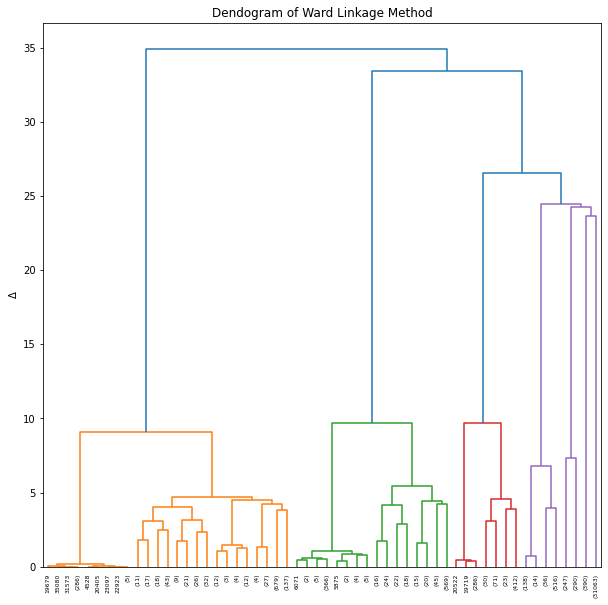

In [33]:
Z = linkage(text_, method='ward')
plot1(Z)
plt.title('Dendogram of Ward Linkage Method')
plt.show()
fig_caption('Dendogram of Ward Linkage Method', '')

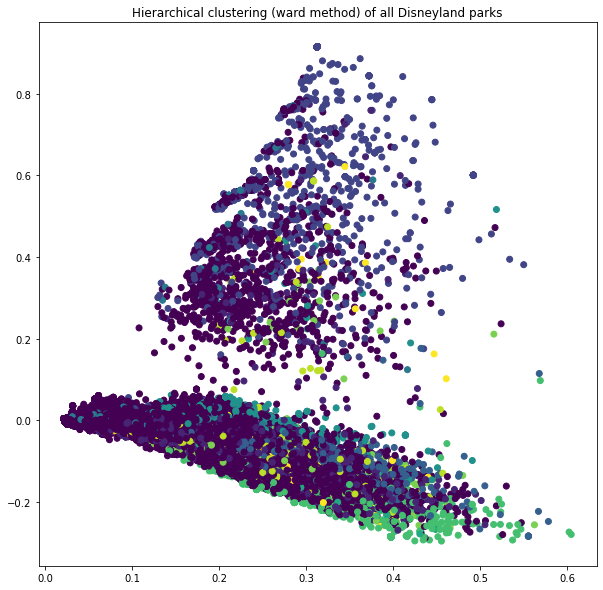

In [34]:
agg = AgglomerativeClustering(n_clusters=None, linkage='ward',
                              distance_threshold=20)
y_predict = agg.fit_predict(text_)
plt.scatter(text_[:, 0], text_[:, 1], c=y_predict)
plt.title('Hierarchical clustering (ward method) of all Disneyland '
          'parks')
plt.show()
fig_caption('Hierarchical clustering (ward method) of all Disneyland '
            'parks', '')

In [35]:
print(f"The ward-method hierarchical clustering yields "
      f"{len(np.unique(y_predict))} clusters.")

The ward-method hierarchical clustering yields 11 clusters.


The best value for k occurs at k=11. From the generated dendrogram, the largest effort to merge occurs at around 10 to 24, so by setting a threshold between those values (in our case, we set it to distance_threshold=20), we could get better clustering. Applying this threshold, then plotting the points with colors indicating the cluster, the plot shows `11 clusters`.

Based on the dendogram the optimal number of clusters is 11 which is the best out of all the heirarchal clustering technique. However based on analysis the 11 clusters is still too much for the segmentation of topics. Given this we will not be applying heirarchal to analyze the clusters.

<h3 style="color:#000000">Density-Based Clustering (DBSCAN, OPTICS)</h3>

In this section, we will try two different Density-based clustering methods: `DBSCAN`, and `OPTICS`.

In [36]:
def ave_nn_dist(n_neighbors, data):
    """Accepts the `n_neighbors` to consider and the `data` then returns the
    average distance of a point to its  𝑘=1 nearest neighbor up to
    𝑘=𝑛_𝑛𝑒𝑖𝑔ℎ𝑏𝑜𝑟𝑠 nearest neighbor as a sorted list."""
    from sklearn.neighbors import NearestNeighbors
    nn = NearestNeighbors(n_neighbors=n_neighbors).fit(data)
    dists = list(np.sort(nn.kneighbors()[0].mean(axis=1)))

    return dists

**DBSCAN**

In [37]:
ndim = text_.shape[1]
print(f"The dataset has {ndim} dimensions.")

The dataset has 108 dimensions.


The dataset has 108 dimensions so 𝑀𝑖𝑛𝑃𝑡𝑠 should be at least 108. Let's double it, 𝑀𝑖𝑛𝑃𝑡𝑠=216, to make the cluster denser. We then plot the average distances up to the 216th nearest neighbor.

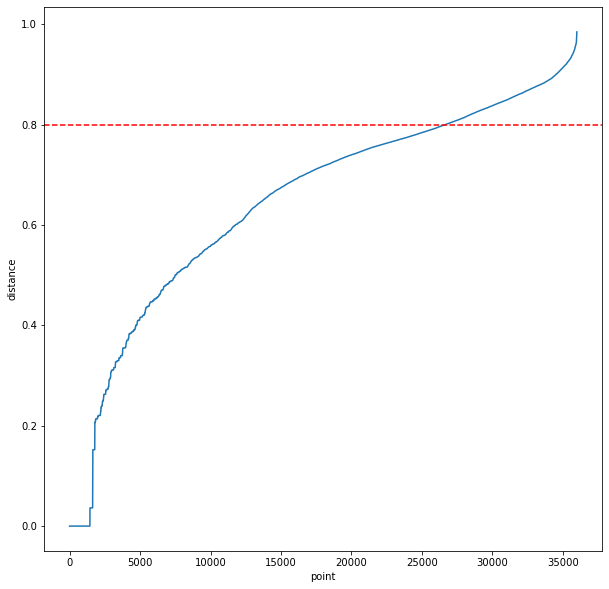

In [38]:
plt.plot(ave_nn_dist(ndim*2, text_))
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel('point')
plt.ylabel('distance')
plt.show()
fig_caption('Nearest Neighbor plot for DBSCAN', '')

Eyeballing the plot above, it seems the elbow is around `0.8` so we set $\epsilon=0.8$. We run DBSCAN on our dataset with $\epsilon=0.8$ and $MinPts=216$.

Number of clusters: 1
Number of noise points: 597
Number of points: 35986


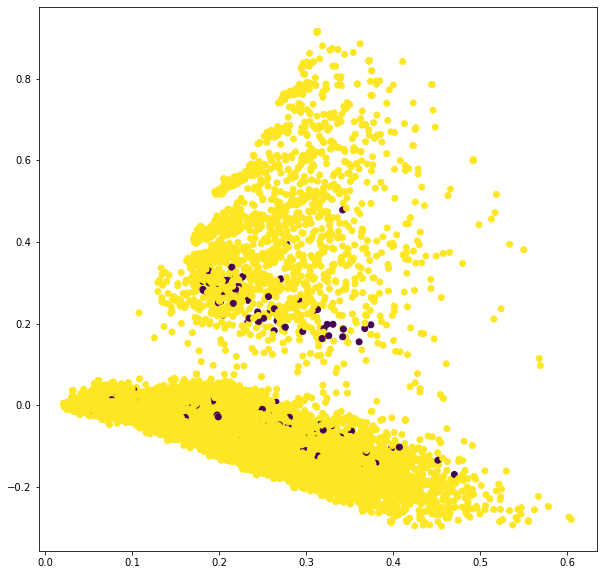

In [39]:
dbscan = DBSCAN(eps=0.8, min_samples=ndim*2)
cluster_labels = dbscan.fit_predict(text_)
plt.scatter(text_[:, 0], text_[:, 1], c=cluster_labels)
fig_caption('DBSCAN clustering for all Disneyland parks', '')
print('Number of clusters:', cluster_labels.max()+1)
print('Number of noise points:', (cluster_labels==-1).sum())
print('Number of points:', len(cluster_labels))

The hyperparameter $MinPts=216$ was chosen to be twice the number of dimensions (ndim=108) to make the cluster denser. On the other hand, the $\epsilon=0.8$ was selected by plotting the average distance of a point to its 𝑘=1 nearest neighbor up to 𝑘=216, then getting the elbow of the plot. As a result, the data formed `1 clusters` with only `597 noise points`.

**OPTICS**

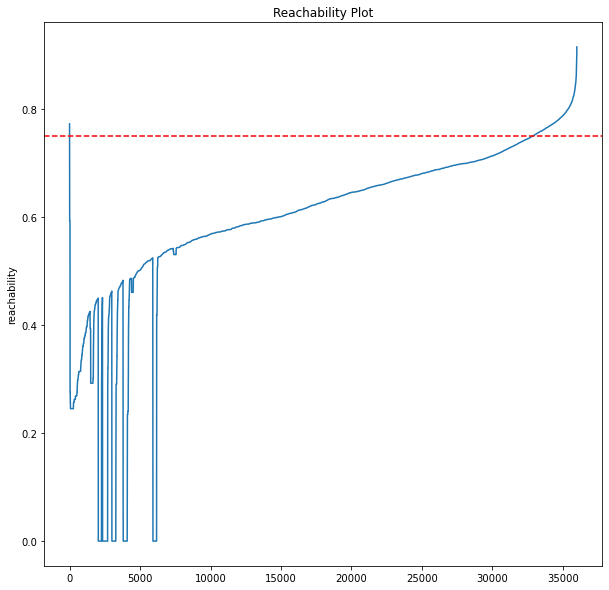

In [40]:
optics = OPTICS(min_samples=ndim*2)
optics.fit(text_)
plt.plot(optics.reachability_[optics.ordering_])
plt.axhline(y=0.75, color='r', linestyle='--')
plt.ylabel('reachability')
plt.title('Reachability Plot')
plt.show()
fig_caption('Reachability Plot', '')

Eyeballing the plot above, it seems if we cut the plot along y=`0.75`, we would cut along steep boundaries. Therefore we set our hyperparameter `eps=0.75`.

Number of clusters: 1
Number of noise points: 3084
Number of points: 35986


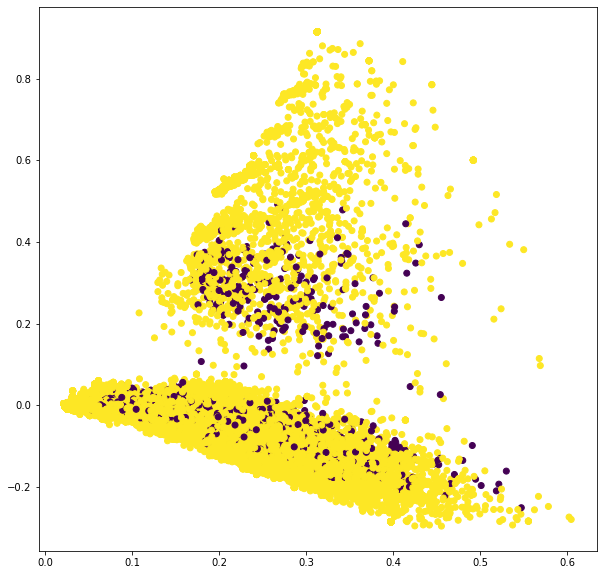

In [41]:
cluster_labels = cluster_optics_dbscan(
    reachability=optics.reachability_,
    core_distances=optics.core_distances_,
    ordering=optics.ordering_,
    eps=0.75
)
plt.scatter(text_[:, 0], text_[:, 1], c=cluster_labels)
print('Number of clusters:', cluster_labels.max()+1)
print('Number of noise points:', (cluster_labels==-1).sum())
print('Number of points:', len(cluster_labels))
fig_caption('OPTICS clustering for all Disneyland parks', '')

The reachability plot with `n_samples=216` (twice the dimensions) was set to have a smoother plot. After which, we identify the steep boundary and set the hyperparameter $eps=0.75$. As a result, the data formed `1 clusters` with only `1 noise point`.

Based on the outcome of the density based clustering it does not meet the criteria's of having a good cluster given that its just a single cluster being suggested for both of the techniques we used. Therefore out of all the techniques we used we will be using k-means as this has provided the best and most interpretable results.

<h2 style="color:#f7c020">Clustering Labeling and Analysis</h2>

After carefully analyzing different clustering methods, the group identified K-Means yielded the best results using internal validation scores and clustering quality criteria (compact, separated, parsimonious). However, the clustering always has a dominant cluster, as supported by the EDA. Therefore, ratings are skewed in favor of positive ratings.

In determining the topic of each cluster, only the top 10 frequent words are considered. For visualization, the word cloud shows up to top 20 words.

<h3 style="color:#000000">Disneyland (All Branches)</h3>

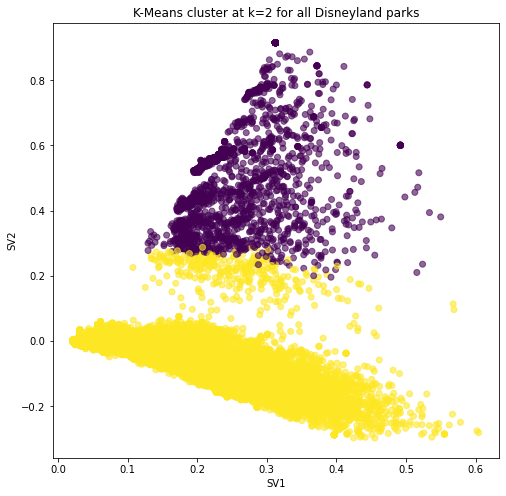

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(2, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=2 for all Disneyland parks')
plt.show()
fig_caption('K-Means cluster at k=2 for all Disneyland parks', '')

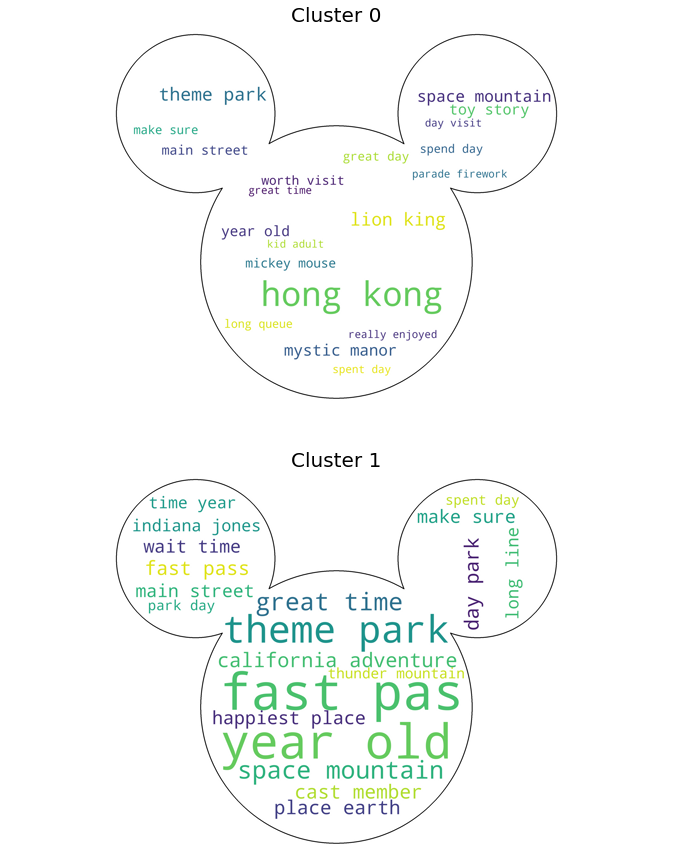

In [43]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5,
    contour_color='black',
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax = ax.flatten()
# fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
                    fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=2) clustering for all Disneyland parks',
            '')

In [44]:
print("Cluster label distribution of K-Means (k=2) for All Disneyland Parks")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster label distribution of K-Means (k=2) for All Disneyland Parks


cluster_label  counts
1              0    2101
0              1   33885

Clustering of all Disneyland parks has an optimal k at `k=2` using the internal validation, specifically looking into the `DB` score nearest to 0. The clustering passes 3 of 4 criteria of the clusters being separated with some overlaps, compact, `parsimonious` number of clusters. However, distribution is imbalanced due to Cluster 0 having `95%` of the data.

* **Cluster 0** – Hongkong visit, talking about Disney characters in the park, various ride attractions, and how worth their visit was as a general theme.
* **Cluster 1** - Pertains to use Fast Pass due to long queue time, having a great time in the happiest place on earth, year old where they have their kids together, and stories about their California visit may be related to queue times.

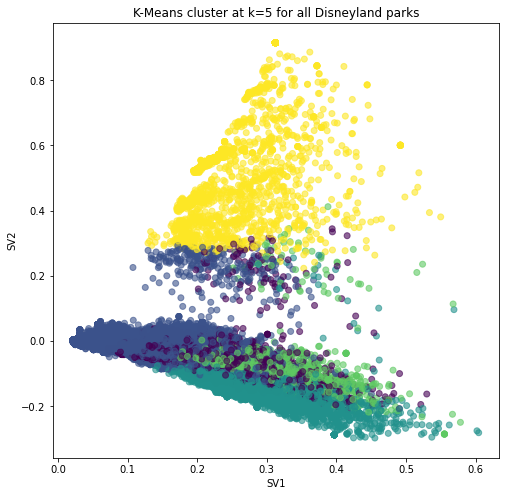

In [45]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(5, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=5 for all Disneyland parks')
plt.show()
fig_caption('K-Means cluster at k=5 for all Disneyland parks', '')

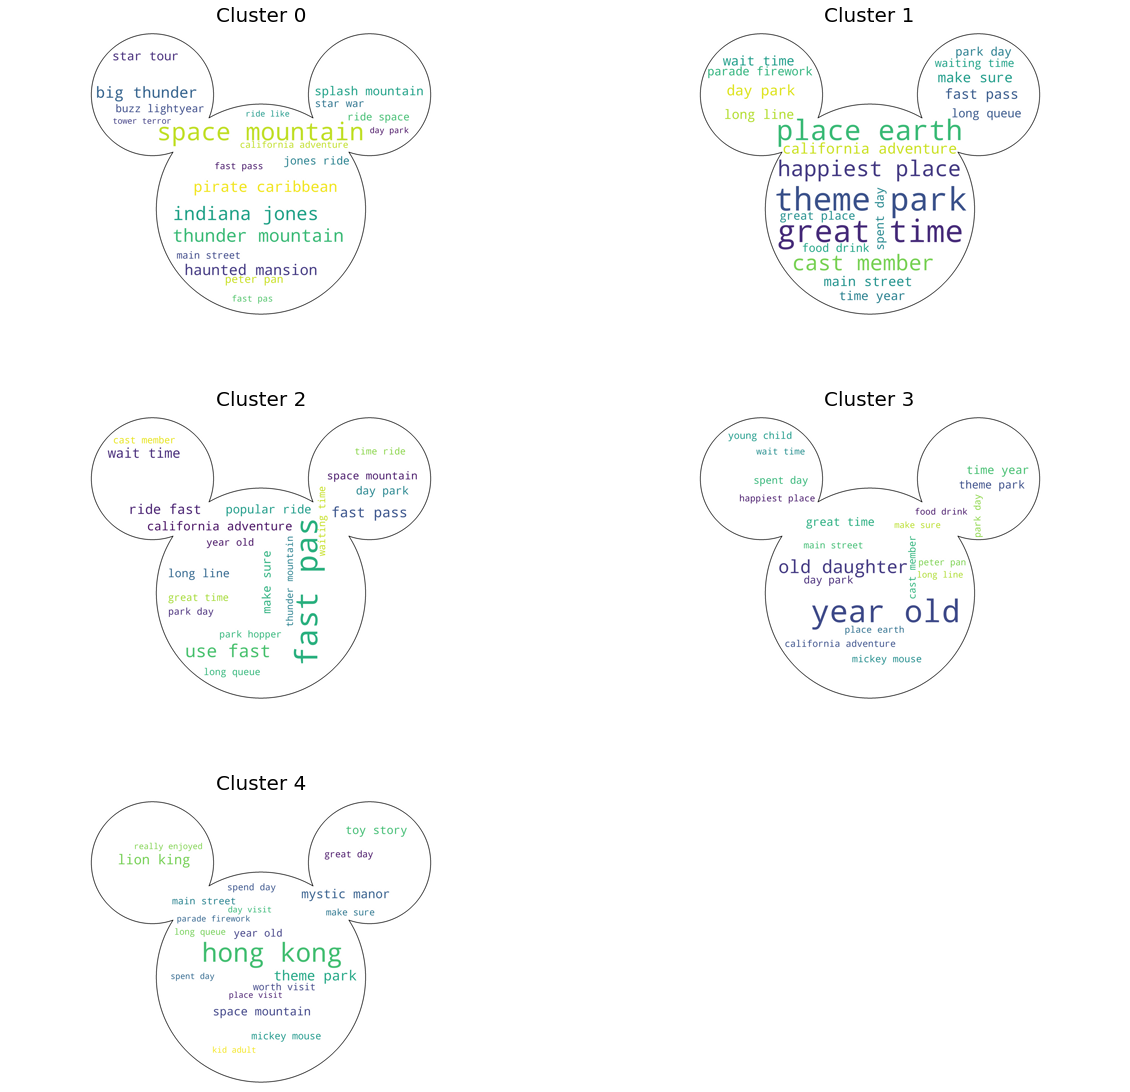

In [46]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.flatten()
fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=5) clustering for all Disneyland parks',
            '')

In [47]:
print("Cluster label distribution of K-Means (k=5) for All Disneyland Parks")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster label distribution of K-Means (k=5) for All Disneyland Parks


cluster_label  counts
1              0    3932
0              1   24611
2              2    2942
3              3    2491
4              4    2010

Given that the 2 clusters have two distinct themes, we tried expanding the clusters further, not considering any scores to see if we get any further insights. With `k=5` clusters, it provided five distinct themes though 4/5 out of it still focuses on using a fast pass, which pertains to long queues in the park. We also have a similar scenario where we have a dominant Cluster of `79%` of the data set at `Cluster 1`.
* **Cluster 0** – Stories how worth it their visit is at the theme park in hong kong and main street and mentioned the rides and Disney characters.
* **Cluster 1** –The topics under this cluster pertain to the people having a great time with their visit and how great the park is. Most of the reviews here are from their California adventure, and like the previous 3 clusters, the topics still push for the use of the fast pass.
* **Cluster 2** – Similar to our optimal cluster, this pertains to using Fast Pass due to long queue time and ensuring people have it. They are pointing out that the California adventure may have long queues. Still, the topics here point out being the happiest place on earth though not the most dominant feature we have.
* **Cluster 3** – Year old here pertains to the kids they have, especially year-old daughters, who spent the day and enjoyed the park. These are more sentimental reviews about the park and still, remind us of using a fast pass.
* **Cluster 4** – Talks about how worth it the visit. Most of the reviews are about Hongkong. Both kids and adult enjoy the rides but it also talks about long queues (all day spend queueing).

We can see a much more diverse set of topics with certain relevance to each other, given that it's still all about Disneyland, but we can interpret a theme in each of its clusters.

<h3 style="color:#000000">Hongkong Disneyland</h3>

In [48]:
df = pd.read_sql(
    """SELECT * 
    FROM disneyland_reviews 
    WHERE branch='Disneyland_HongKong'
    """, conn)
display(df)

Review_ID  Rating Year_Month     Reviewer_Location  \
0     670772142       4     2019-4             Australia   
1     670682799       4     2019-5           Philippines   
2     670623270       4     2019-4  United Arab Emirates   
3     670607911       4     2019-4             Australia   
4     670607296       4     2019-4        United Kingdom   
...         ...     ...        ...                   ...   
9615    4033897       1       None         United States   
9616    4020946       2       None         United States   
9617    3998899       4       None        United Kingdom   
9618    3924467       4       None           Philippines   
9619    3530053       2       None        United Kingdom   

                                            Review_Text               Branch  \
0     If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1     Its been a while since d last time we visit HK...  Disneyland_HongKong   
2     Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3     HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4     the location is not in the city, took around 1...  Disneyland_HongKong   
...                                                 ...                  ...   
9615  My husband and I took our 2 kids and it was th...  Disneyland_HongKong   
9616  The park is small. Tiny small.They say one of ...  Disneyland_HongKong   
9617  Visited Hong Kong Disneyland on the 28th Septe...  Disneyland_HongKong   
9618  Visited Hkg Disney Sept 16 ,5 days after it of...  Disneyland_HongKong   
9619  Obviously I haven't visited Hong Kong Disneyla...  Disneyland_HongKong   

      Year Month  
0     2019     4  
1     2019     5  
2     2019     4  
3     2019     4  
4     2019     4  
...    ...   ...  
9615  None  None  
9616  None  None  
9617  None  None  
9618  None  None  
9619  None  None  

[9620 rows x 8 columns]

We will now apply text vectorization to our text reviews.

In [49]:
txt = process_text(df.Review_Text)
text, tfidf = vectorize_corpus(txt)
text_labels = tfidf.get_feature_names_out()
df_text = pd.DataFrame(text.toarray(), columns=text_labels)
display(df_text)

Removing non A-Z a-z...
Removing stop words...
Applying autocorrect and stem word...
Text cleaning done.
Start vectorization...
Text vectorization done.


able ride  adventure land  amusement park  beauty castle  best ride  \
0           0.0             0.0             0.0            0.0        0.0   
1           0.0             0.0             0.0            0.0        0.0   
2           0.0             0.0             0.0            0.0        0.0   
3           0.0             0.0             0.0            0.0        0.0   
4           0.0             0.0             0.0            0.0        0.0   
...         ...             ...             ...            ...        ...   
8308        0.0             0.0             0.0            0.0        0.0   
8309        0.0             0.0             0.0            0.0        0.0   
8310        0.0             0.0             0.0            0.0        0.0   
8311        0.0             0.0             0.0            0.0        0.0   
8312        0.0             0.0             0.0            0.0        0.0   

      big grizzly  bought ticket  buy ticket  buzz lightyear  cast member  \
0             0.0       0.000000         0.0        0.000000     0.000000   
1             0.0       0.000000         0.0        0.284288     0.296881   
2             0.0       0.000000         0.0        0.000000     0.000000   
3             0.0       0.000000         0.0        0.000000     0.000000   
4             0.0       0.000000         0.0        0.000000     0.000000   
...           ...            ...         ...             ...          ...   
8308          0.0       0.000000         0.0        0.000000     0.000000   
8309          0.0       0.000000         0.0        0.000000     0.000000   
8310          0.0       0.293431         0.0        0.000000     0.000000   
8311          0.0       0.000000         0.0        0.000000     0.000000   
8312          0.0       0.000000         0.0        0.340329     0.000000   

      ...  wait time  waiting time  winnie pooh  worth visit  year ago  \
0     ...        0.0           0.0     0.000000     0.000000       0.0   
1     ...        0.0           0.0     0.000000     0.000000       0.0   
2     ...        0.0           0.0     0.000000     0.000000       0.0   
3     ...        0.0           0.0     0.000000     0.000000       0.0   
4     ...        0.0           0.0     0.000000     0.000000       0.0   
...   ...        ...           ...          ...          ...       ...   
8308  ...        0.0           0.0     0.000000     0.000000       0.0   
8309  ...        0.0           0.0     0.000000     0.000000       0.0   
8310  ...        0.0           0.0     0.000000     0.259247       0.0   
8311  ...        0.0           0.0     0.398173     0.000000       0.0   
8312  ...        0.0           0.0     0.319109     0.000000       0.0   

      year old  young child  young kid  younger kid  yr old  
0          0.0          0.0        0.0          0.0     0.0  
1          0.0          0.0        0.0          0.0     0.0  
2          0.0          0.0        0.0          0.0     0.0  
3          0.0          0.0        0.0          0.0     0.0  
4          0.0          0.0        0.0          0.0     0.0  
...        ...          ...        ...          ...     ...  
8308       0.0          0.0        0.0          0.0     0.0  
8309       0.0          0.0        0.0          0.0     0.0  
8310       0.0          0.0        0.0          0.0     0.0  
8311       0.0          0.0        0.0          0.0     0.0  
8312       0.0          0.0        0.0          0.0     0.0  

[8313 rows x 166 columns]

After applying text vectorization, we get a sparse matrix where the rows represent each review, and the columns are the words in our corpus. We also returned the tfidf vectorizer object.

The minimum number of SVs to get at least 80% of explained variance is 103.


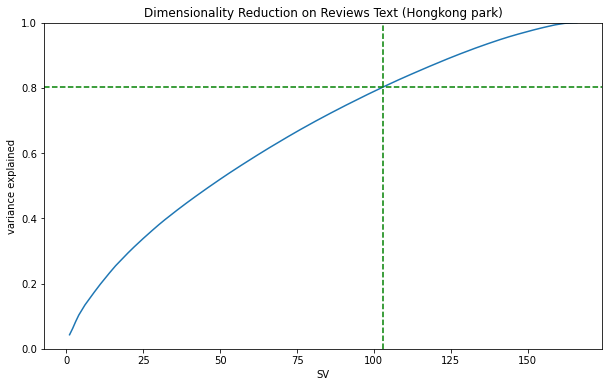

In [50]:
svd = TruncatedSVD(n_components=df_text.shape[1], random_state=214)
svd.fit_transform(df_text)
var_exp_cumsum = svd.explained_variance_ratio_.cumsum()
n_sv = np.argmax(var_exp_cumsum >= 0.8) + 1
print(f"The minimum number of SVs to get at least 80% of explained variance"
      f" is {n_sv}.")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(var_exp_cumsum)+1), var_exp_cumsum, '-', label='cumulative')
ax.set_ylim(0, 1)
ax.axvline(n_sv, ls='--', color='g')
ax.axhline(var_exp_cumsum[n_sv-1], ls='--', color='g')
ax.set_title('Dimensionality Reduction on Reviews Text (Hongkong park)')
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')
plt.show()
fig_caption('Dimensionality Reduction on Reviews Text (Hongkong park)', '')

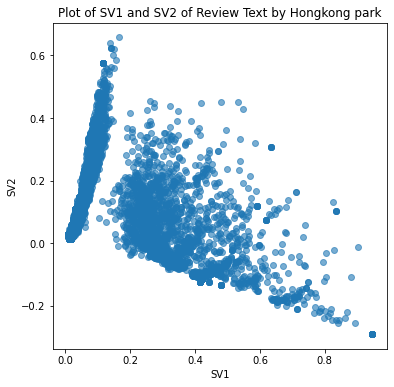

In [51]:
lsa = TruncatedSVD(n_components=n_sv, random_state=214)
text_ = lsa.fit_transform(df_text)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(text_[:, 0], text_[:, 1], alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('Plot of SV1 and SV2 of Review Text by Hongkong park')
plt.show()
fig_caption('Plot of SV1 and SV2 of Review Text by Hongkong park', '')

In [52]:
res = cluster_range(text_, KMeans(random_state=214), 2, 11)

100%|██████████| 10/10 [00:51<00:00,  5.19s/it]


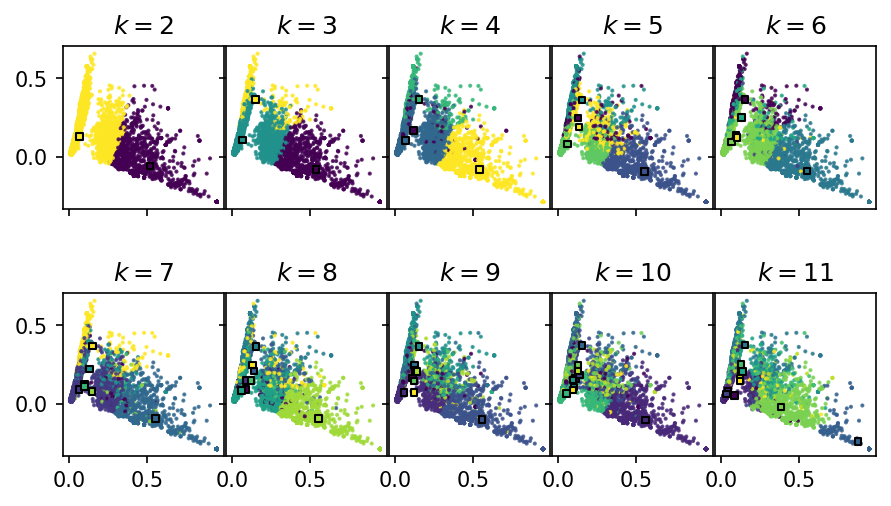

In [53]:
plot_clusters(text_[:, :2], res['ys'], res['centers'])
plt.show()
fig_caption('Plot of different K-Means clustering (k=2 to 11) for Hongkong '
            'park', '')

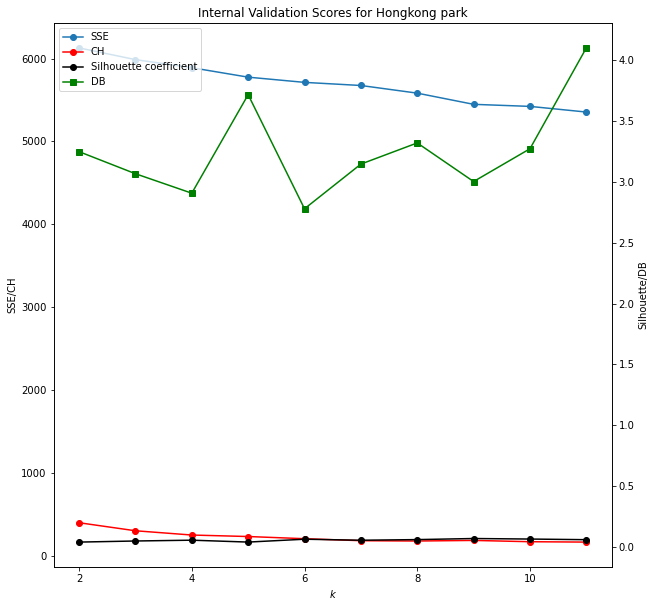

In [54]:
#Plot internal validation scores
plot_internal(res['inertias'], res['chs'], 
              res['scs'], res['dbs'])
plt.title('Internal Validation Scores for Hongkong park')
plt.show()
fig_caption('Internal Validation Scores for Hongkong park', '')

Using internal validation scores, the optimal cluster for the Hong Kong branch can be either `k=2` or `7`.

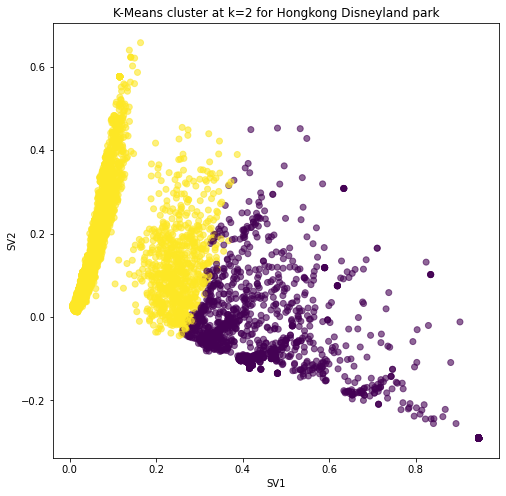

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(2, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=2 for Hongkong Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=2 for Hongkong Disneyland park', '')

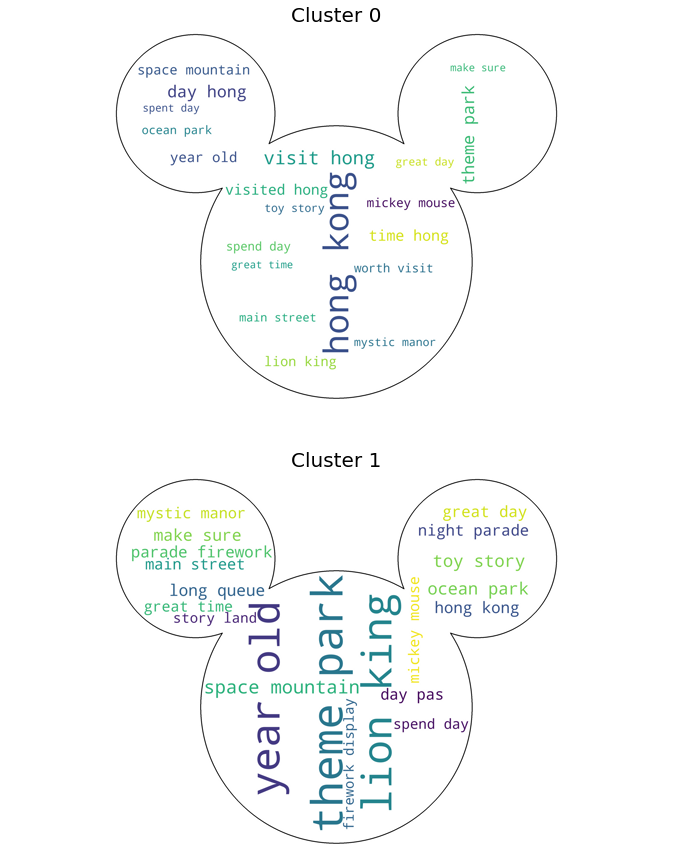

In [56]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax = ax.flatten()
# fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=2) clustering for Hongkong park', '')

In [57]:
print("Cluster distribution of K-Means (k=2) for Hongkong Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=2) for Hongkong Disneyland Park


cluster_label  counts
1              0    1472
0              1    6841

For two, if we use the internal validation score of CH, where there's a huge difference in value as seen in the chart with no elbow curve for SSE in addition to other criteria of determining a good cluster on how it separated, compact, parsimonious like for our primary clustering and here there's also Cluster 1 which is dominant with `82%` of the data points.
* **Cluster 0** – It talks about the visit to Hong Kong Park and their experience of spending a day there, along with the rides and Disney characters.
* **Cluster 1** -This is more focused on the ride review. Maybe lion king is a good attraction, Disney characters, compared with ocean park, and we can still see here about the long queue. 


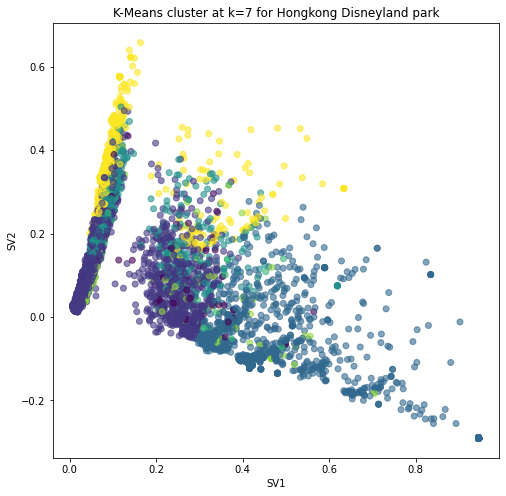

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(7, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=7 for Hongkong Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=7 for Hongkong Disneyland park', '')

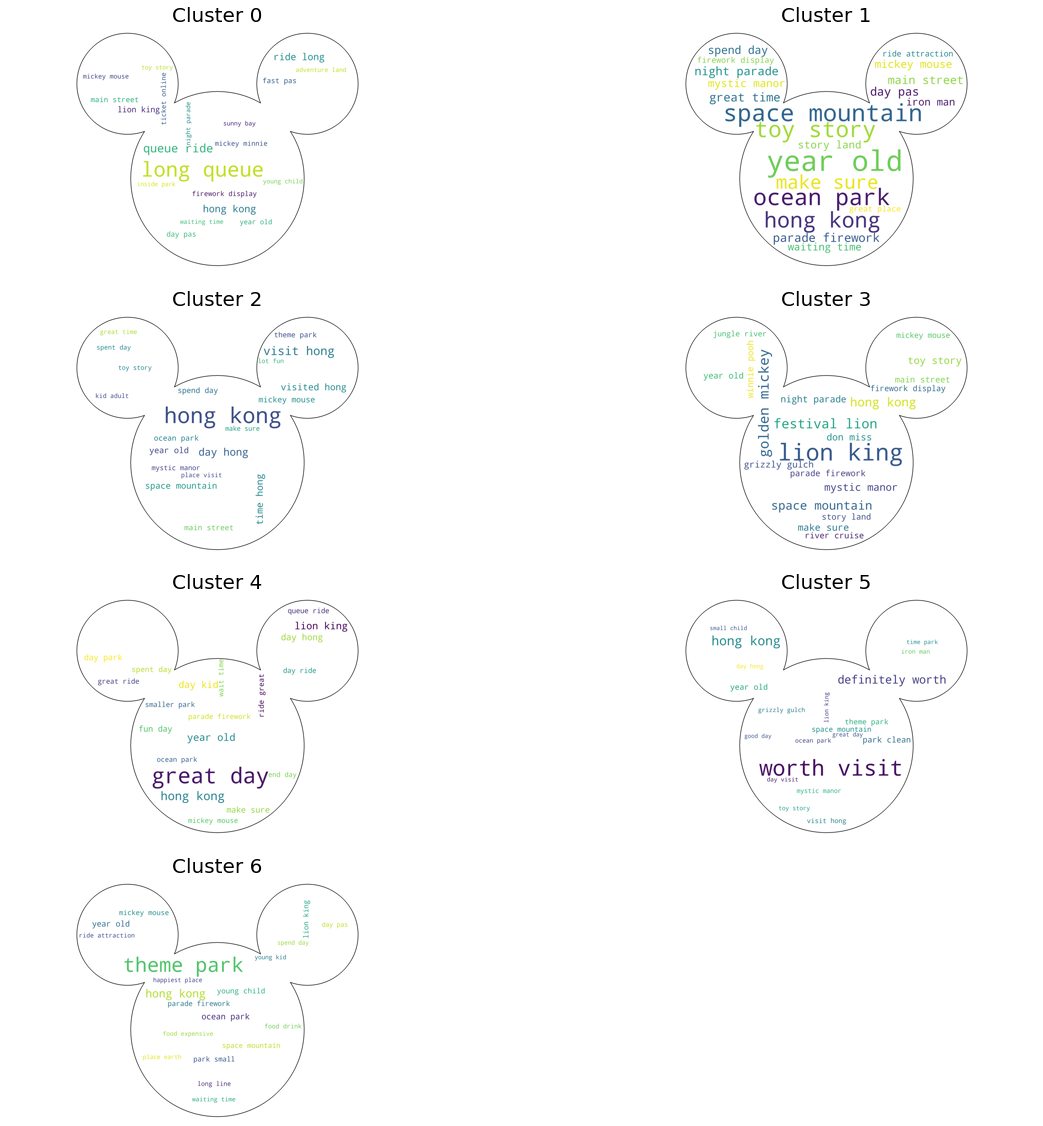

In [59]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(4, 2, figsize=(20, 20))
ax = ax.flatten()
fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=7) clustering for Hongkong park', '')

In [60]:
print("Cluster distribution of K-Means (k=7) for Hongkong Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=7) for Hongkong Disneyland Park


cluster_label  counts
4              0     294
0              1    5230
1              2    1185
2              3     649
5              4     240
6              5     196
3              6     519

For `k=7`, this is where DB and SC have good scores, and CH pushed up a bit in value, though visually, it may only have passed being parsimonious due to still a low number of clusters, and the rest are not that good if we inspect the chart. However, there's still a dominant cluster in this scenario: `Cluster 1`, which contains `62%` of the data points.

* **Cluster 0** - This talks about long queue and waiting time with the line.
* **Cluster 1** – This is like the previous dominant cluster talking about the long queues, lion king, and having a great day in the park. There's also a day pas that might be similar to the fast pass.  
* **Cluster 2** – This cluster focused on the different rides and attractions. As we can see, almost all words pertain to Disney's characters and rides.
* **Cluster 3** – Talks about ensuring you don't miss the attractions, especially the night parade and fireworks.
* **Cluster 4** – This talks about spending a day in Hong Kong Disneyland, how they visited, and how it was worth it, and Disney characters, Lion King and Mickey. 
* **Cluster 5** – Cluster seems to be quite similar to Cluster 4, but they might be reviewing it in a more general sense, and we can see how they mentioned the park is small and about the ride attraction and using a day pass.
* **Cluster 6** – These reviews pertain to potential comparison to Ocean Park and Universal Studios of Hong Kong Disneyland, along which ride is best, like space mountain. We can see lion king again here, along with how small the park is.

We can see how some clusters overlap, but we can still distinguish the difference in the context of each content of the clusters.

<h3 style="color:#000000">California Disneyland</h3>

In [61]:
df = pd.read_sql(
    """SELECT * 
    FROM disneyland_reviews 
    WHERE branch='Disneyland_California'
    """, conn)
display(df)

Review_ID  Rating Year_Month Reviewer_Location  \
0      670801367       5     2019-4     United States   
1      670760708       5     2019-4     United States   
2      670565072       4     2019-5         Australia   
3      670544335       5     2019-4     United States   
4      670472278       5     2019-4            Canada   
...          ...     ...        ...               ...   
19401    1563280       5       None     United States   
19402    1540854       5       None     United States   
19403    1534364       1       None     United States   
19404    1506324       5       None     United States   
19405    1398724       5       None     United States   

                                             Review_Text  \
0      This place has always been and forever will be...   
1      A great day of simple fun and thrills. Bring c...   
2      All and all a great day was had. The crowds ar...   
3      Having been to the Florida location numerous t...   
4      Had the 4 day pass, spent 3 at DL and one at C...   
...                                                  ...   
19401  I have taken my music groups to Disneyland for...   
19402  This is definitely the Happiest Place on Earth...   
19403  never again...what a horrible experience, the ...   
19404  We take a long weekend trip to California each...   
19405  Disnyeland has to be the BEST place to take a ...   

                      Branch  Year Month  
0      Disneyland_California  2019     4  
1      Disneyland_California  2019     4  
2      Disneyland_California  2019     5  
3      Disneyland_California  2019     4  
4      Disneyland_California  2019     4  
...                      ...   ...   ...  
19401  Disneyland_California  None  None  
19402  Disneyland_California  None  None  
19403  Disneyland_California  None  None  
19404  Disneyland_California  None  None  
19405  Disneyland_California  None  None  

[19406 rows x 8 columns]

We will now apply text vectorization to our text reviews.

In [62]:
txt = process_text(df.Review_Text)
text, tfidf = vectorize_corpus(txt)
text_labels = tfidf.get_feature_names_out()
df_text = pd.DataFrame(text.toarray(), columns=text_labels)
display(df_text)

Removing non A-Z a-z...
Removing stop words...
Applying autocorrect and stem word...
Text cleaning done.
Start vectorization...
Text vectorization done.


able ride  adventure park  amusement park  annual pas  best time  \
0       0.000000             0.0             0.0         0.0        0.0   
1       0.000000             0.0             0.0         0.0        0.0   
2       0.000000             0.0             0.0         0.0        0.0   
3       0.000000             0.0             0.0         0.0        0.0   
4       0.443662             0.0             0.0         0.0        0.0   
...          ...             ...             ...         ...        ...   
16116   0.000000             0.0             0.0         0.0        0.0   
16117   0.000000             0.0             0.0         0.0        0.0   
16118   0.000000             0.0             0.0         0.0        0.0   
16119   0.000000             0.0             0.0         0.0        0.0   
16120   0.000000             0.0             0.0         0.0        0.0   

       big thunder  blue bayou  california adventure  car land  car ride  ...  \
0         0.000000         0.0                   0.0       0.0       0.0  ...   
1         0.000000         0.0                   0.0       0.0       0.0  ...   
2         0.000000         0.0                   0.0       0.0       0.0  ...   
3         0.000000         0.0                   0.0       0.0       0.0  ...   
4         0.000000         0.0                   0.0       0.0       0.0  ...   
...            ...         ...                   ...       ...       ...  ...   
16116     0.000000         0.0                   0.0       0.0       0.0  ...   
16117     0.000000         0.0                   0.0       0.0       0.0  ...   
16118     0.000000         0.0                   0.0       0.0       0.0  ...   
16119     0.000000         0.0                   0.0       0.0       0.0  ...   
16120     0.110676         0.0                   0.0       0.0       0.0  ...   

       wait line  wait minute  wait ride  wait time  waiting line  \
0       0.000000          0.0   0.000000    0.00000      0.000000   
1       0.000000          0.0   0.000000    0.00000      0.000000   
2       0.000000          0.0   0.000000    0.00000      0.000000   
3       0.000000          0.0   0.000000    0.00000      0.000000   
4       0.000000          0.0   0.000000    0.00000      0.000000   
...          ...          ...        ...        ...           ...   
16116   0.000000          0.0   0.000000    0.00000      0.000000   
16117   0.483445          0.0   0.000000    0.38169      0.478412   
16118   0.000000          0.0   0.000000    0.00000      0.000000   
16119   0.846053          0.0   0.309005    0.00000      0.000000   
16120   0.000000          0.0   0.000000    0.00000      0.000000   

       waiting time  wonderful time  year ago  year old  young child  
0               0.0             0.0       0.0  0.000000          0.0  
1               0.0             0.0       0.0  0.000000          0.0  
2               0.0             0.0       0.0  0.000000          0.0  
3               0.0             0.0       0.0  0.000000          0.0  
4               0.0             0.0       0.0  0.000000          0.0  
...             ...             ...       ...       ...          ...  
16116           0.0             0.0       0.0  0.443551          0.0  
16117           0.0             0.0       0.0  0.366760          0.0  
16118           0.0             0.0       0.0  0.000000          0.0  
16119           0.0             0.0       0.0  0.000000          0.0  
16120           0.0             0.0       0.0  0.000000          0.0  

[16121 rows x 153 columns]

After applying text vectorization, we get a sparse matrix where the rows represent each review, and the columns are the words in our corpus. We also returned the tfidf vectorizer object.

The minimum number of SVs to get at least 80% of explained variance is 96.


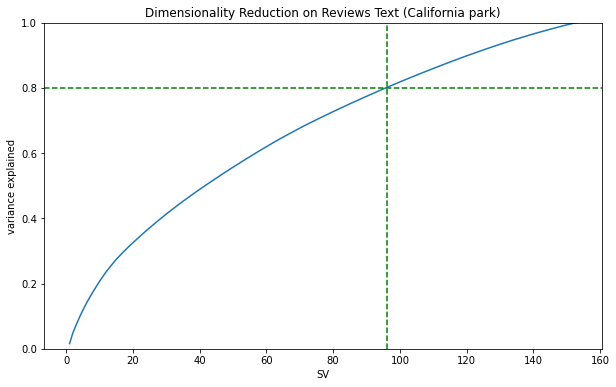

In [63]:
svd = TruncatedSVD(n_components=df_text.shape[1], random_state=214)
svd.fit_transform(df_text)
var_exp_cumsum = svd.explained_variance_ratio_.cumsum()
n_sv = np.argmax(var_exp_cumsum >= 0.8) + 1
print(f"The minimum number of SVs to get at least 80% of explained variance"
      f" is {n_sv}.")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(var_exp_cumsum)+1), var_exp_cumsum, '-', label='cumulative')
ax.set_ylim(0, 1)
ax.axvline(n_sv, ls='--', color='g')
ax.axhline(var_exp_cumsum[n_sv-1], ls='--', color='g')
ax.set_title('Dimensionality Reduction on Reviews Text (California park)')
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')
plt.show()
fig_caption('Dimensionality Reduction on Reviews Text (California park)', '')

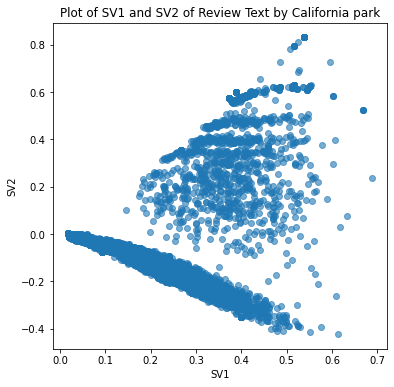

In [64]:
lsa = TruncatedSVD(n_components=n_sv, random_state=214)
text_ = lsa.fit_transform(df_text)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(text_[:, 0], text_[:, 1], alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('Plot of SV1 and SV2 of Review Text by California park')
plt.show()
fig_caption('Plot of SV1 and SV2 of Review Text by California park', '')

In [65]:
res = cluster_range(text_, KMeans(random_state=214), 2, 11)

100%|██████████| 10/10 [01:52<00:00, 11.22s/it]


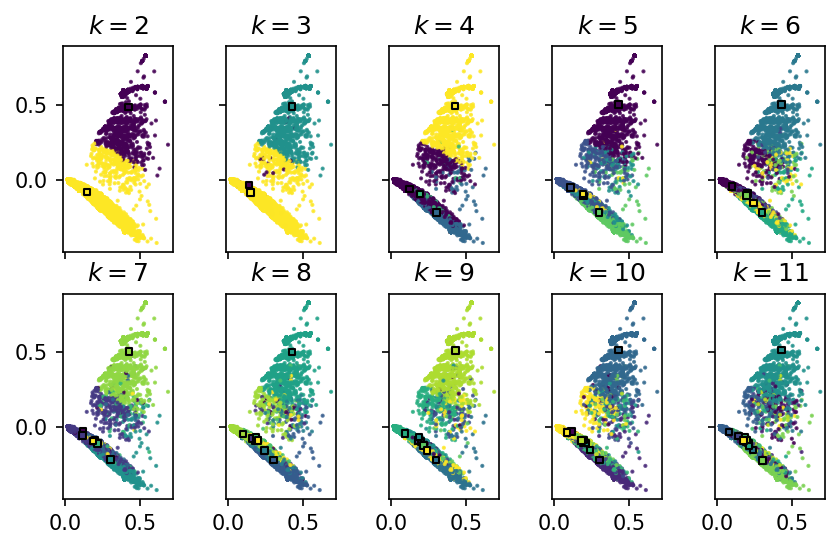

In [66]:
plot_clusters(text_[:, :2], res['ys'], res['centers'])
plt.show()
fig_caption('Plot of different K-Means clustering (k=2 to 11) for California '
            'park', '')

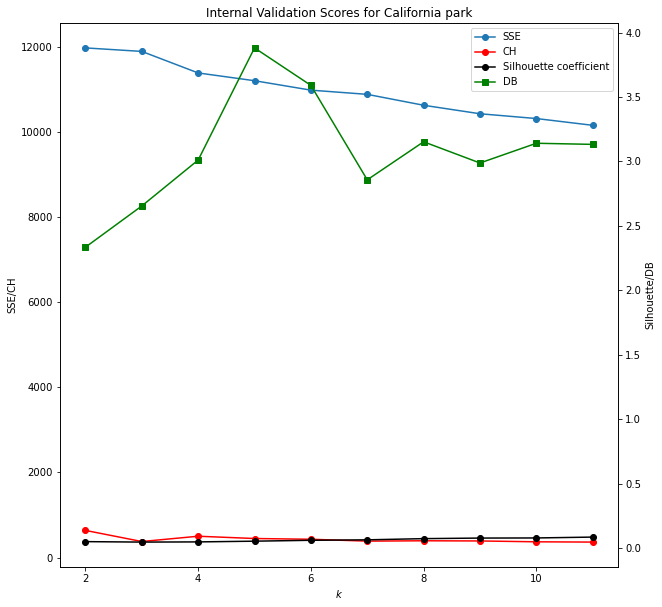

In [67]:
#Plot internal validation scores
plot_internal(res['inertias'], res['chs'], 
              res['scs'], res['dbs'])
plt.title('Internal Validation Scores for California park')
plt.show()
fig_caption('Internal Validation Scores for California park', '')

Using internal validation scores, the optimal cluster for the California branch is `k=2`.

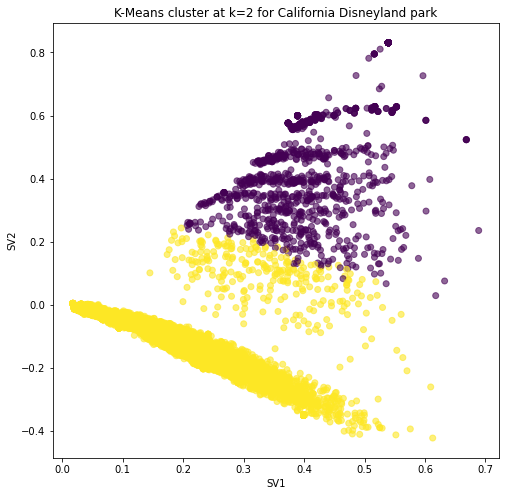

In [68]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(2, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=2 for California Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=2 for California Disneyland park', '')

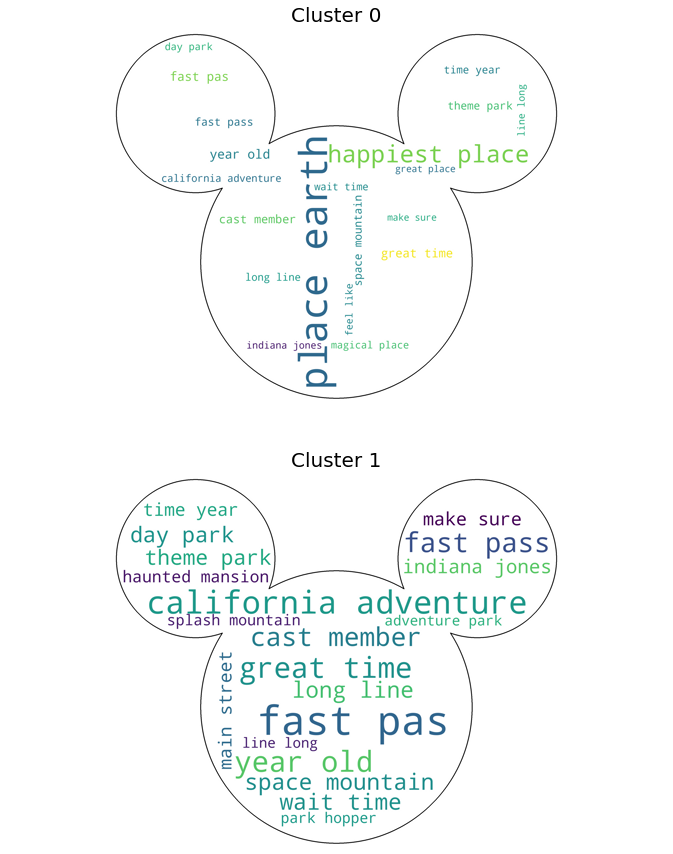

In [69]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(2, 1, figsize=(15, 15))
ax = ax.flatten()
# fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=2) clustering for California park', '')

In [70]:
print("Cluster distribution of K-Means (k=2) for California Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=2) for California Disneyland Park


cluster_label  counts
1              0    1247
0              1   14874

The optimal cluster for the California branch using internal validation scores is `k=2`. The graph of this one is very similar to our primary clustering. Similarly, the clustering passes 3 of 4 criteria of the clusters being separated with some overlaps, compact, parsimonious number of clusters. Distribution is imbalanced due to `Cluster 1` having `92%` of the data.
* **Cluster 0** – The reviews under this cluster show very positive reviews on how this is the happiest place on earth. They had a great time and recommended using a fast pass.
* **Cluster 1** – The reviews here mostly provide feedback on the use of the fast pass, spending the day in the park having long lines and wait time which is related to the use of the fast pass for their California adventure, where they still had a great time.

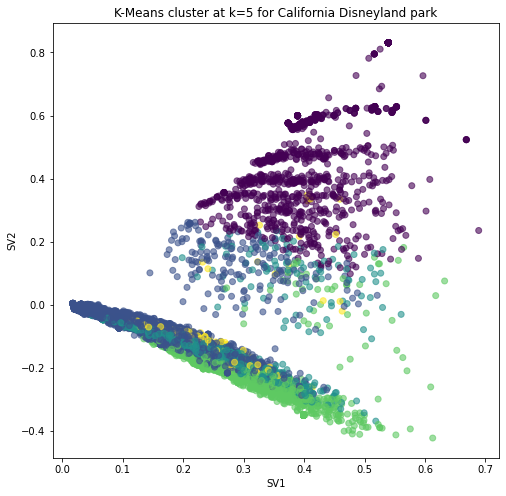

In [71]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(5, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=5 for California Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=5 for California Disneyland park', '')

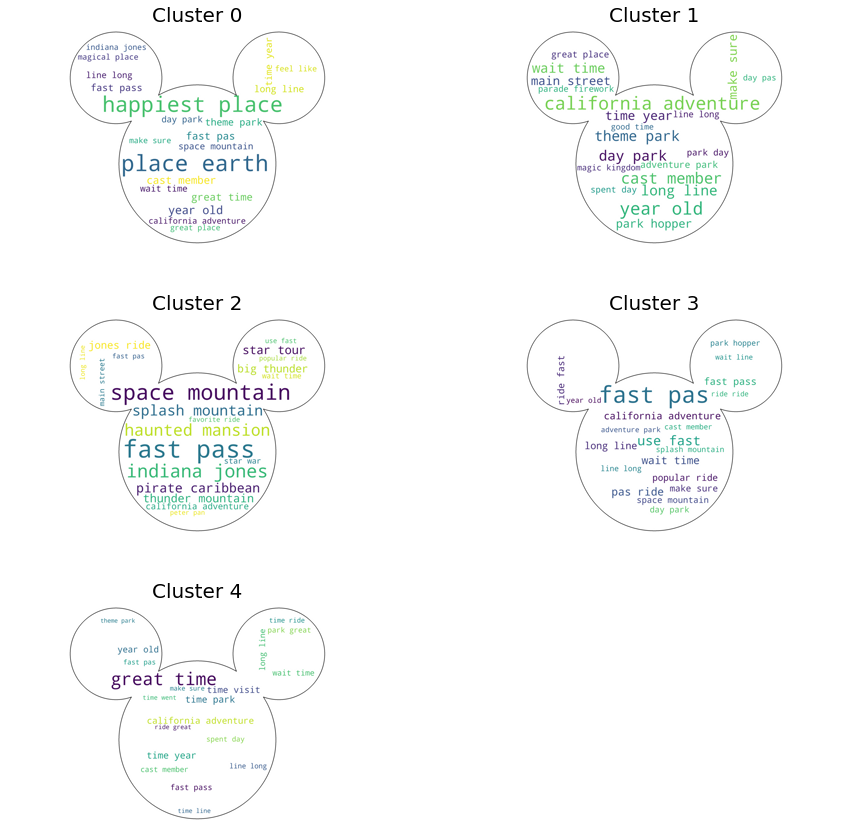

In [72]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
ax = ax.flatten()
fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=5) clustering for California park', '')

In [73]:
print("Cluster distribution of K-Means (k=5) for California Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=5) for California Disneyland Park


cluster_label  counts
3              0    1189
0              1    9924
1              2    2621
2              3    1540
4              4     847

We can also explore further and expand the clusters. We also tried multiple groupings and found that at least `5` clusters are sufficient to represent the grouping. However, the internal validation scores and the quality clustering do not meet the criteria. The dominant cluster, `Cluster 1`, also holds `67%` of the data point. We also need to note all topics about long lines and the use of the fast pass.

* **Cluster 0** – Reviews on how this is the happiest place on earth and how they had a great time in the park, even with long lines with the fast pass.  
* **Cluster 1** – Cluster talks about how friendly and helpful the cast members were in the park and enjoyed with the year old family about their adventure in California.
* **Cluster 2** - This is similar to cluster but encourages people to use fast pass for the ride.
* **Cluster 3** – This cluster mostly describes the use of fast pass and how long the wait times are in the ride with their California adventure in the popular rides.
* **Cluster 4** - This is a general review of the park. How they enjoy the park however they still have the same complain as others.

This is quite challenging to expand given that the general theme across all reviews seems to be complaints about the long lines, wait times, and encouraging people to use the fast pass option.


<h3 style="color:#000000">Paris Disneyland</h3>

In [74]:
df = pd.read_sql(
    """SELECT * 
    FROM disneyland_reviews 
    WHERE branch='Disneyland_Paris'
    """, conn)
display(df)

Review_ID  Rating Year_Month     Reviewer_Location  \
0      670721950       5     2019-3  United Arab Emirates   
1      670686565       4     2018-6        United Kingdom   
2      670606796       5     2019-4        United Kingdom   
3      670586937       4     2019-4             Australia   
4      670535589       5       None                France   
...          ...     ...        ...                   ...   
13625    1765031       5       None        United Kingdom   
13626    1659553       5       None                Canada   
13627    1645894       5       None          South Africa   
13628    1618637       4       None         United States   
13629    1536786       4       None        United Kingdom   

                                             Review_Text            Branch  \
0      We've been to Disneyland Hongkong and Tokyo, s...  Disneyland_Paris   
1      I went to Disneyland Paris in April 2018 on Ea...  Disneyland_Paris   
2      What a fantastic place, the queues were decent...  Disneyland_Paris   
3      We didn't realise it was school holidays when ...  Disneyland_Paris   
4      A Trip to Disney makes you all warm and fuzzy ...  Disneyland_Paris   
...                                                  ...               ...   
13625  i went to disneyland paris in july 03 and thou...  Disneyland_Paris   
13626  2 adults and 1 child of 11 visited Disneyland ...  Disneyland_Paris   
13627  My eleven year old daughter and myself went to...  Disneyland_Paris   
13628  This hotel, part of the Disneyland Paris compl...  Disneyland_Paris   
13629  I went to the Disneyparis resort, in 1996, wit...  Disneyland_Paris   

       Year Month  
0      2019     3  
1      2018     6  
2      2019     4  
3      2019     4  
4      None  None  
...     ...   ...  
13625  None  None  
13626  None  None  
13627  None  None  
13628  None  None  
13629  None  None  

[13630 rows x 8 columns]

We will now apply text vectorization to our text reviews.

In [75]:
txt = process_text(df.Review_Text)
text, tfidf = vectorize_corpus(txt)
text_labels = tfidf.get_feature_names_out()
df_text = pd.DataFrame(text.toarray(), columns=text_labels)
display(df_text)

Removing non A-Z a-z...
Removing stop words...
Applying autocorrect and stem word...
Text cleaning done.
Start vectorization...
Text vectorization done.


absolutely loved  adult child  adult kid  amazing time  \
0                   0.0      0.00000   0.000000           0.0   
1                   0.0      0.00000   0.000000           0.0   
2                   0.0      0.00000   0.000000           0.0   
3                   0.0      0.00000   0.000000           0.0   
4                   0.0      0.00000   0.000000           0.0   
...                 ...          ...        ...           ...   
12467               0.0      0.00000   0.444353           0.0   
12468               0.0      0.00000   0.000000           0.0   
12469               0.0      0.37339   0.000000           0.0   
12470               0.0      0.00000   0.000000           0.0   
12471               0.0      0.00000   0.000000           0.0   

       attraction closed  beauty castle  best ride  best time  big ride  \
0                    0.0            0.0        0.0    0.00000       0.0   
1                    0.0            0.0        0.0    0.00000       0.0   
2                    0.0            0.0        0.0    0.61237       0.0   
3                    0.0            0.0        0.0    0.00000       0.0   
4                    0.0            0.0        0.0    0.00000       0.0   
...                  ...            ...        ...        ...       ...   
12467                0.0            0.0        0.0    0.00000       0.0   
12468                0.0            0.0        0.0    0.00000       0.0   
12469                0.0            0.0        0.0    0.00000       0.0   
12470                0.0            0.0        0.0    0.00000       0.0   
12471                0.0            0.0        0.0    0.00000       0.0   

       big thunder  ...  wonderful time  worth money  worth visit  worth wait  \
0              0.0  ...             0.0          0.0          0.0         0.0   
1              0.0  ...             0.0          0.0          0.0         0.0   
2              0.0  ...             0.0          0.0          0.0         0.0   
3              0.0  ...             0.0          0.0          0.0         0.0   
4              0.0  ...             0.0          0.0          0.0         0.0   
...            ...  ...             ...          ...          ...         ...   
12467          0.0  ...             0.0          0.0          0.0         0.0   
12468          0.0  ...             0.0          0.0          0.0         0.0   
12469          0.0  ...             0.0          0.0          0.0         0.0   
12470          0.0  ...             0.0          0.0          0.0         0.0   
12471          0.0  ...             0.0          0.0          0.0         0.0   

       year ago  year old  young child  young kid  younger child  yr old  
0           0.0  0.000000          0.0   0.000000            0.0     0.0  
1           0.0  0.000000          0.0   0.000000            0.0     0.0  
2           0.0  0.000000          0.0   0.000000            0.0     0.0  
3           0.0  0.000000          0.0   0.000000            0.0     0.0  
4           0.0  0.000000          0.0   0.000000            0.0     0.0  
...         ...       ...          ...        ...            ...     ...  
12467       0.0  0.000000          0.0   0.000000            0.0     0.0  
12468       0.0  0.000000          0.0   0.366823            0.0     0.0  
12469       0.0  0.000000          0.0   0.000000            0.0     0.0  
12470       0.0  0.203703          0.0   0.000000            0.0     0.0  
12471       0.0  0.000000          0.0   0.000000            0.0     0.0  

[12472 rows x 274 columns]

After applying text vectorization, we get a sparse matrix where the rows represent each review, and the columns are the words in our corpus. We also returned the tfidf vectorizer object.

The minimum number of SVs to get at least 80% of explained variance is 180.


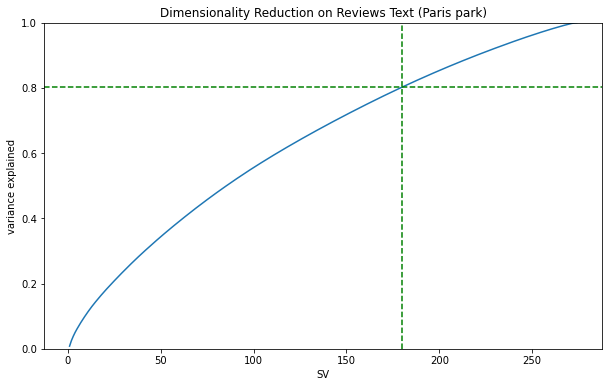

In [76]:
svd = TruncatedSVD(n_components=df_text.shape[1], random_state=214)
svd.fit_transform(df_text)
var_exp_cumsum = svd.explained_variance_ratio_.cumsum()
n_sv = np.argmax(var_exp_cumsum >= 0.8) + 1
print(f"The minimum number of SVs to get at least 80% of explained variance"
      f" is {n_sv}.")

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, len(var_exp_cumsum)+1), var_exp_cumsum, '-', label='cumulative')
ax.set_ylim(0, 1)
ax.axvline(n_sv, ls='--', color='g')
ax.axhline(var_exp_cumsum[n_sv-1], ls='--', color='g')
ax.set_title('Dimensionality Reduction on Reviews Text (Paris park)')
ax.set_xlabel('SV')
ax.set_ylabel('variance explained')
plt.show()
fig_caption('Dimensionality Reduction on Reviews Text (Paris park)', '')

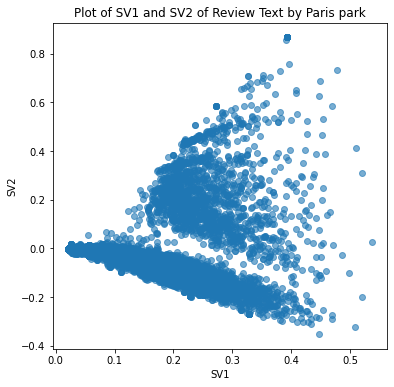

In [77]:
lsa = TruncatedSVD(n_components=n_sv, random_state=214)
text_ = lsa.fit_transform(df_text)

fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(text_[:, 0], text_[:, 1], alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('Plot of SV1 and SV2 of Review Text by Paris park')
plt.show()
fig_caption('Plot of SV1 and SV2 of Review Text by Paris park', '')

In [78]:
res = cluster_range(text_, KMeans(random_state=214), 2, 11)

100%|██████████| 10/10 [01:42<00:00, 10.27s/it]


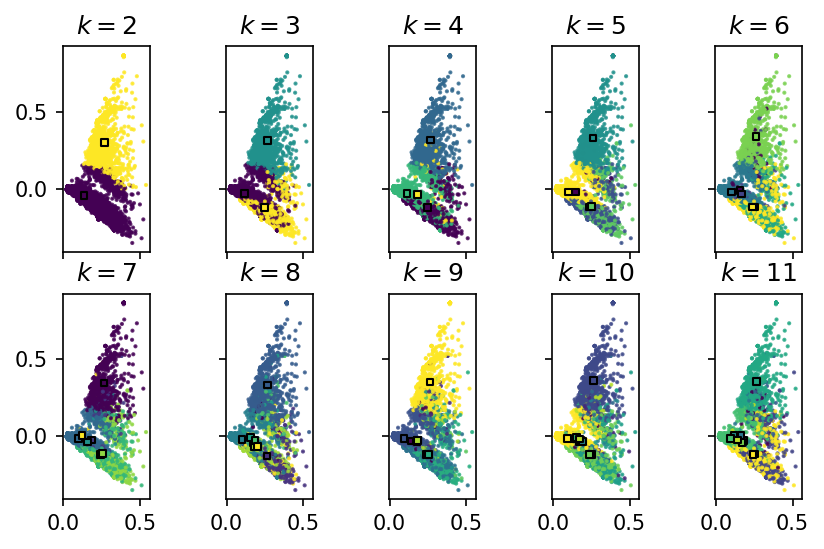

In [79]:
plot_clusters(text_[:, :2], res['ys'], res['centers'])
plt.show()
fig_caption('Plot of different K-Means clustering (k=2 to 11) for Paris '
            'park', '')

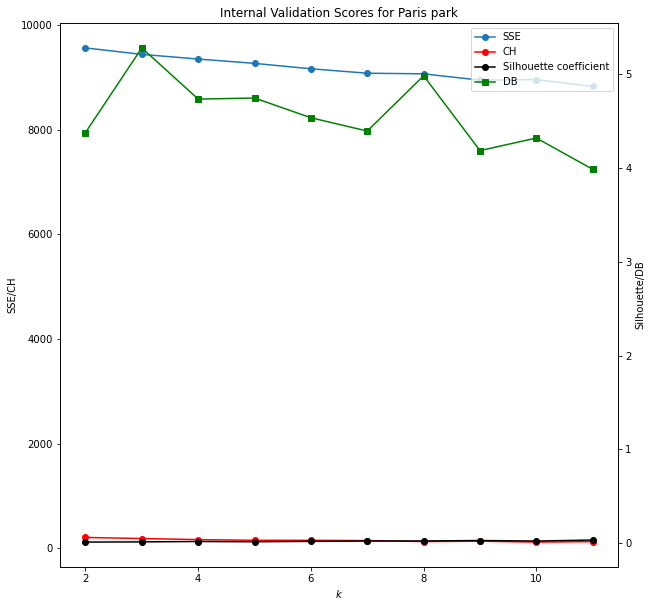

In [80]:
#Plot internal validation scores
plot_internal(res['inertias'], res['chs'], 
              res['scs'], res['dbs'])
plt.title('Internal Validation Scores for Paris park')
plt.show()
fig_caption('Internal Validation Scores for Paris park', '')

Using internal validation scores, the optimal cluster for the Paris branch is `k=3`.

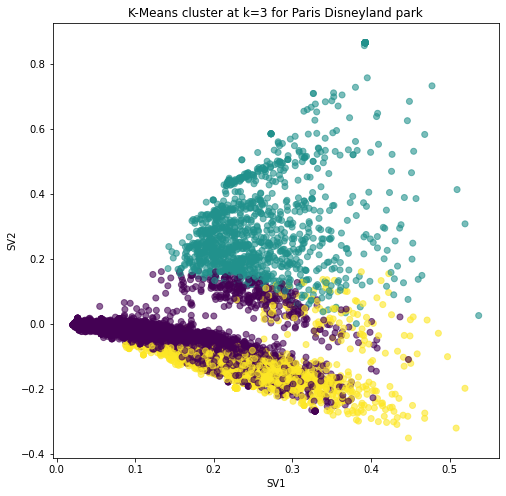

In [81]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(3, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=3 for Paris Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=3 for Paris Disneyland park', '')

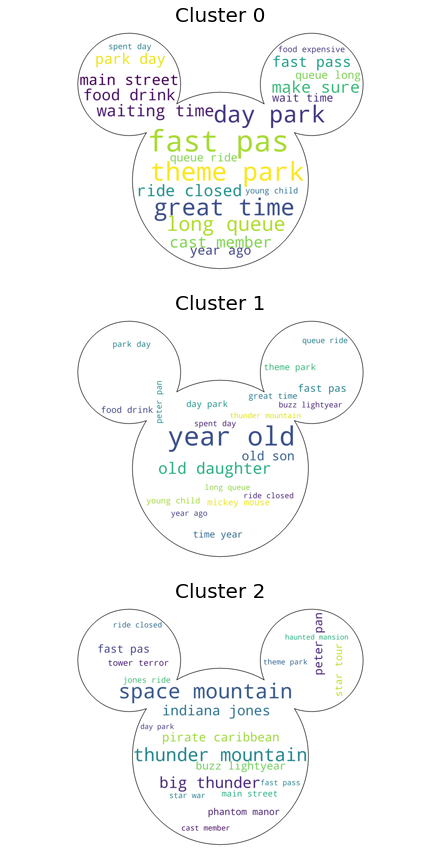

In [82]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
ax = ax.flatten()
# fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=3) clustering for Paris park', '')

In [83]:
print("Cluster distribution of K-Means (k=3) for Paris Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=3) for Paris Disneyland Park


cluster_label  counts
0              0    9642
2              1    1137
1              2    1693

The optimal cluster for the Paris branch using internal validation scores is `k=3`. The CH has the highest value, with DB going down as well; however, SC still improves like SSE as it increases. We also chose 3 to make it interpretable for smaller clusters, and we can expand on a higher cluster. If we review the image that the clusters are compact with their regions, parsimonious, we can see the separation though there are many overlaps. Like other clusters, this has a dominant cluster, `cluster 0`, which has `81%` of the data points.
* **Cluster 0** – This cluster talks about the great time they had in the park and which were the good rides. We can also note that the topics mostly talks about long queue and having rides closed.
* **Cluster 1** – Cluster talks about having their child with them, mentioning how old they are and the first time we see the daughter and son. They might have also loved mickey and peter pan and had reviews above the food.
* **Cluster 2** – The cluster talks about using fast passes multiple times for the rides due to long wait times, a similar issue we can see with California and our primary cluster.

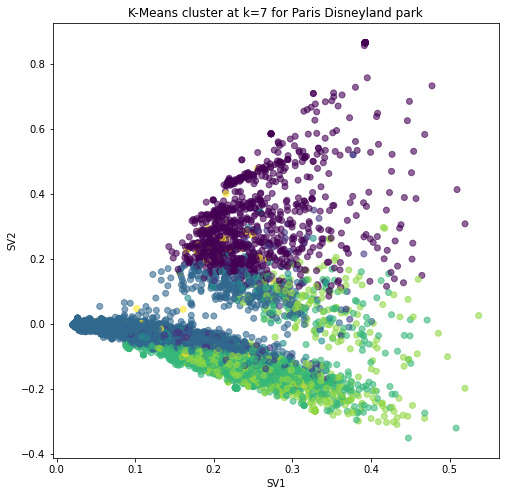

In [84]:
fig, ax = plt.subplots(figsize=(8, 8))
km = KMeans(7, random_state=214)
cluster_labels = km.fit_predict(text_)
plt.scatter(text_[:,0], text_[:,1], c=cluster_labels, alpha=0.6)
plt.xlabel('SV1')
plt.ylabel('SV2')
plt.title('K-Means cluster at k=7 for Paris Disneyland park')
plt.show()
fig_caption('K-Means cluster at k=7 for Paris Disneyland park', '')

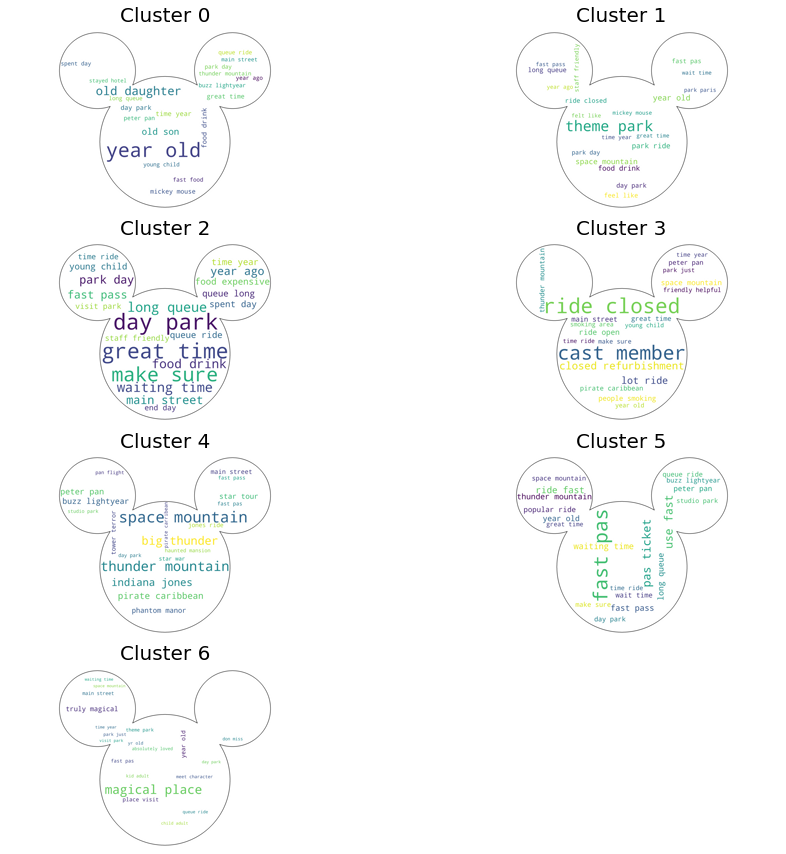

In [85]:
df_cls = df_text.copy()
df_cls['cluster'] = cluster_labels

# Word Cloud Generator
mask = np.array(Image.open('./Mickey-Mouse-Symbol.png'))
wc = WordCloud(
    background_color='white',
    max_words=20,
    mask=mask,
    contour_width=5, 
    contour_color='black', 
)

# Plotting all wordclound in single figure
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
ax = ax.flatten()
fig.delaxes(ax[-1])
for i in range(df_cls['cluster'].nunique()):
    ax[i].imshow(
        wc.generate_from_frequencies(
            df_cls[df_cls['cluster'] == i].sum().drop('cluster')),
        interpolation='spline16')
    ax[i].set_title(f'Cluster {i}',
              fontdict={'size': 20,  'verticalalignment': 'bottom'})
    ax[i].set_axis_off()
plt.show()
fig_caption('Word Cloud of K-Means (k=7) clustering for Paris park', '')

In [86]:
print("Cluster distribution of K-Means (k=7) for Paris Disneyland Park")
(df_cls['cluster'].value_counts().rename_axis('cluster_label')
 .reset_index(name='counts').sort_values('cluster_label'))

Cluster distribution of K-Means (k=7) for Paris Disneyland Park


cluster_label  counts
3              0     942
5              1     561
0              2    7639
4              3     709
1              4    1346
2              5    1033
6              6     242

We also tried expanding the clusters to uncover more topics and identified topics with 7 clusters representing the branch well. We can also note that the scores for the other internal validation get better as it increases; however, the interpretation of clusters becomes more cumbersome.

* **Cluster 0** – Cluster talks about having their child with them, mentioning how old they are, and similar to the optimal clustering, the mention of the son and daughter is here. There's also a change in preference with buzz lightyear and the food and drinks.
* **Cluster 1** – Cluster talks about them needing to spend a day in the park and using fast pas with their kids.
* **Cluster 2** –This shows positive feedback on the fast pass since they could queue within a few minutes.
* **Cluster 3** - This topic talks about rides that are closed since the reopening of the park. This also mostly complains about the park.
* **Cluster 4** – This talks about the different rides and Disney characters and somewhat being compared to main street California.
* **Cluster 5** –This one is quite similar to Cluster 2, which emphasizes the use of fast pass for long queues and popular rides.
* **Cluster 6** - Both child and adult had a magical time in the park. They were able to meet Disney Characters.

Out of all branches, Paris has the most interpretable clustering might be because the quality of reviews given to this particular branch is much more diverse and relevant. In addition, people may have experienced the park features better and utilized the pass compared to other branches.

<h1 style="color:#fd1617">Conclusion</h1>

**Optimal k**
* As we can see, using the optimal clusters may not always be the best way to cluster objects with topic modeling, as each branch differs in review. However, if combined, there will be a dominant topic. 

**Clustering Behavoir**
* There's always a dominant cluster in our dataset, probably because each review is similar (most of the reviews are rated 5). Expanding the clusters helps us uncover some aspects of the data we may not see if we narrow down and strictly follow the rules. Pushing for analysis to understand the data is crucial. 

**Text Vectorization (TFIDF)**
* We also need to note that playing around with the min_df, max_df, and ngram, including what stop words to include, will highly affect the results of our clusters. 
* We also noticed that even if there's an enormous corpus since we had around 4000+ dimensions in one of our tests, it yielded nearly similar results as we have with this 100+ dimensions. The clusters we came up with may or may not be the best; however, from our point of view, this is helpful for the stakeholders as we have a general theme for each where they can gather value from it. 

**Domain Knowledge**
* Looking into different branches also yielded some unique topics; this is where the familiarity of the data set lies, and domain expertise can maximize the data. To close the clusters alone, we can see that many people are still happy with Disneyland, but the majority point out the long queue times across the parks as the main issue. Where we think Disneyland can address the issue by having a fast pass can reduce the issue, but it's not the solution to the actual problem though it still gives them extra profit.

<h1 style="color:#fd1617">Recommendations</h1>

* Try using other categories such as filtering reviewer location or a combination such as this can help provide more focused recommendations.
* Temporal analysis on multiple periods may help see cycles on the feedback and drilling down per quarter, and by comparing it each year, we may uncover more insights.
* We recommend trying out different combinations for TF-IDF min_df, max_df, ngram, and stopwords, as it would certainly yield other results and insights
* We may also need a much more powerful machine if we want to reduce the min_df as we initially tried only ngram=1, and we encountered that our machines cannot handle the exponential size of results as some reviews are long.
* Balance the reviews based on ratings to capture also those negative reviews. This will enrich the insights we could get from the topic modeling.

<h1 style="color:#fd1617">References</h1>

[1] Wikipedia Contributors. (2019, February 15). Disneyland. Wikipedia; Wikimedia Foundation. Retrieved February 8, 2023 from https://en.wikipedia.org/wiki/Disneyland

[2] Morgan, B. (n.d.). 5 Lessons From Disney’s Magical Customer Experience. Forbes. Retrieved February 8, 2023, from https://www.forbes.com/sites/blakemorgan/2020/01/23/5-lessons-from-disneys-magical-customer-experience/?sh=420b4f887555

[3] Wikipedia Contributors. (2020, March 27). List of amusement park rankings. Wikipedia; Wikimedia Foundation. https://en.wikipedia.org/wiki/List_of_amusement_park_rankings

[4] Jeske, S. (2022, November 1). How To Create More Helpful Content With Topic Modeling & Topic Clusters. Search Engine Journal. Retrieved February 8, 2023 from https://www.searchenginejournal.com/helpful-content-topic-modeling-clusters-marketmuse-spa/468551/

[5] Disneyland EDA and check impurity in text data. (n.d.). Kaggle.com. Retrieved February 8, 2023, from https://www.kaggle.com/code/arushchillar/disneyland-eda-and-check-impurity-in-text-data#EDA

[6] disneyland review_EDA, Senti analysis. (n.d.). Kaggle.com. Retrieved February 8, 2023, from https://www.kaggle.com/code/biiinnn98/disneyland-review-eda-senti-analysis#EDA--&-Visualization

[7] Disneyland Review Analysis. (n.d.). Kaggle.com. Retrieved February 8, 2023, from https://www.kaggle.com/code/deepeshaburse/disneyland-review-analysis